In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf 
from mplfinance.original_flavor import candlestick_ohlc
from scipy.stats import linregress
from scipy.signal import argrelextrema

In [2]:
ticker = ["AAPL","005930.KS","NFLX","AMZN","GOOGL","^GSPC", "^FTSE", "^N225", "^GDAXI", "000001.SS"]

Finding the pivot id. <br>
0: Not a Pivot <br>
1: Low Pivot <br>
2: High Pivot <br>

In [3]:
def pivot_id(data, l, n1, n2):

    if l-n1 < 0 or l+n2 >= len(data):
        return 0
    
    pivot_low  = 1
    pivot_high = 1

    for i in range(l-n1, l+n2+1):
        if(data.loc[l,"Low"] > data.loc[i, "Low"]):
            pivot_low = 0

        if(data.loc[l, "High"] < data.loc[i, "High"]):
            pivot_high = 0

    if pivot_low:
        return 1
    elif pivot_high:
        return 2
    else:
        return 0

In [4]:
def pivot_point_position(row):
   
    if row['Pivot']==1:
        return row['Low']-1e-3
    elif row['Pivot']==2:
        return row['High']+1e-3
    else:
        return np.nan

## Ascending Triangle

In [5]:
def find_triangle_points(data, lookback):
    triangle_points = []
    for ind in range(lookback+10, len(data)):
        
        maxim = np.array([])
        minim = np.array([])
        xxmin = np.array([])
        xxmax = np.array([])

        for i in range(ind-lookback, ind+1):
            if data.loc[i,"Pivot"] == 1:
                minim = np.append(minim, data.loc[i, "Low"])
                xxmin = np.append(xxmin, i) 
            if data.loc[i,"Pivot"] == 2:
                maxim = np.append(maxim, data.loc[i,"High"])
                xxmax = np.append(xxmax, i)

       
        if (xxmax.size <3 and xxmin.size <3) or xxmax.size==0 or xxmin.size==0:
               continue

        slmin, intercmin, rmin, pmin, semin = linregress(xxmin, minim)
        slmax, intercmax, rmax, pmax, semax = linregress(xxmax, maxim)

        if abs(rmax)>=0.9 and abs(rmin)>=0.9 and slmin>=0.02 and (slmax>=-0.011 and slmax <= 0.011):
                triangle_points.append(ind)

    return triangle_points

In [6]:
def plot_ascending_triangle(ohlc, all_triangle_points, backcandles):

    total = len(all_triangle_points)

    for j, triangle_point in enumerate(all_triangle_points):
        candleid = triangle_point
        
        maxim = np.array([])
        minim = np.array([])
        xxmin = np.array([])
        xxmax = np.array([])

        for i in range(candleid-backcandles, candleid+1):
            if ohlc.loc[i,"Pivot"] == 1:
                minim = np.append(minim, ohlc.loc[i, "Low"])
                xxmin = np.append(xxmin, int(i)) 
            if ohlc.loc[i,"Pivot"] == 2:
                maxim = np.append(maxim, ohlc.loc[i,"High"])
                xxmax = np.append(xxmax, int(i))
                

        slmin, intercmin, rmin, pmin, semin = linregress(xxmin, minim)
        slmax, intercmax, rmax, pmax, semax = linregress(xxmax, maxim)

        ohlc_subset = ohlc[candleid-backcandles-10:candleid+backcandles+10]
        ohlc_subset_copy = ohlc_subset.copy()
        ohlc_subset_copy.loc[:,"Index"] = ohlc_subset_copy.index
    
        xxmin = np.append(xxmin, xxmin[-1]+15)
        xxmax = np.append(xxmax, xxmax[-1]+15)

        fig, ax = plt.subplots(figsize=(15,7))

        candlestick_ohlc(ax, ohlc_subset_copy.loc[:, ["Index","Open", "High", "Low", "Close"] ].values, width=0.6, colorup='green', colordown='red', alpha=0.8)

        ax.plot(xxmin, xxmin*slmin + intercmin, linewidth=3, color="purple", alpha=0.85)
        ax.plot(xxmax, xxmax*slmax + intercmax, linewidth=3, color="purple", alpha=0.85)
        ax.grid(True)
        ax.set_xlabel('Days')
        ax.set_ylabel('Price')
        plt.show()

    return None


[*********************100%***********************]  1 of 1 completed


C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


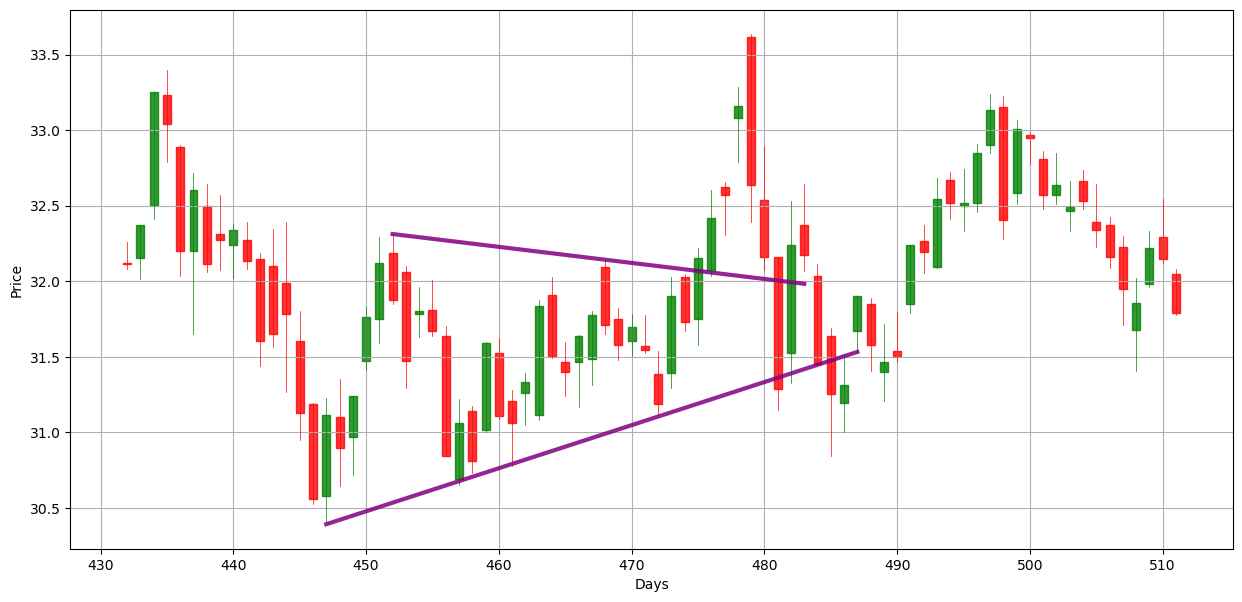

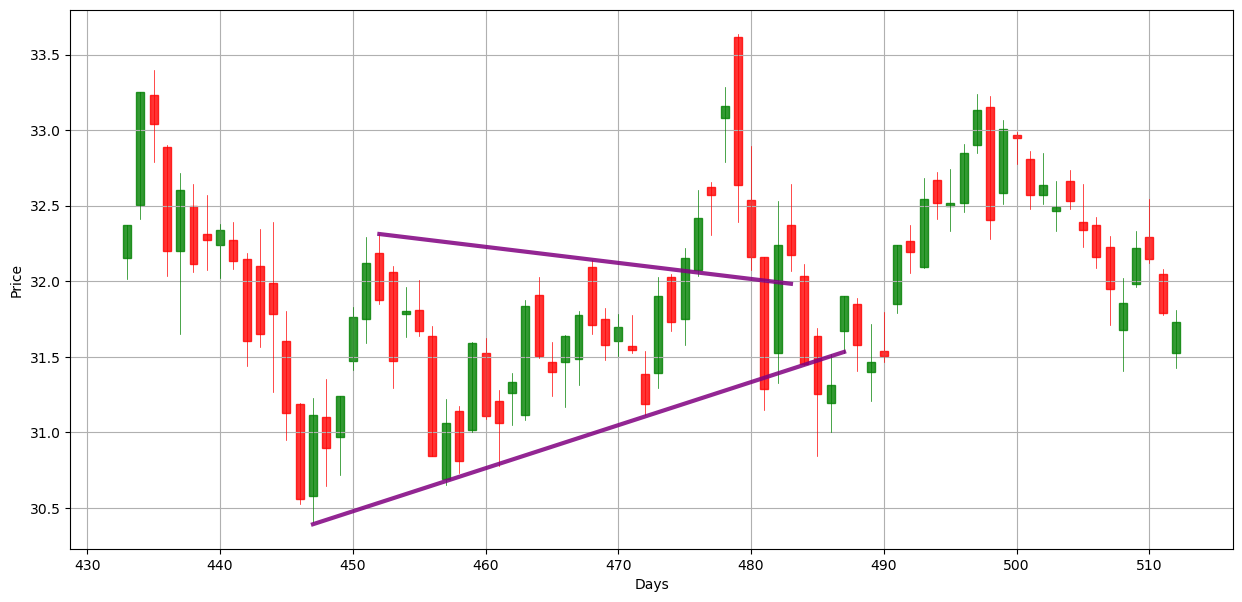

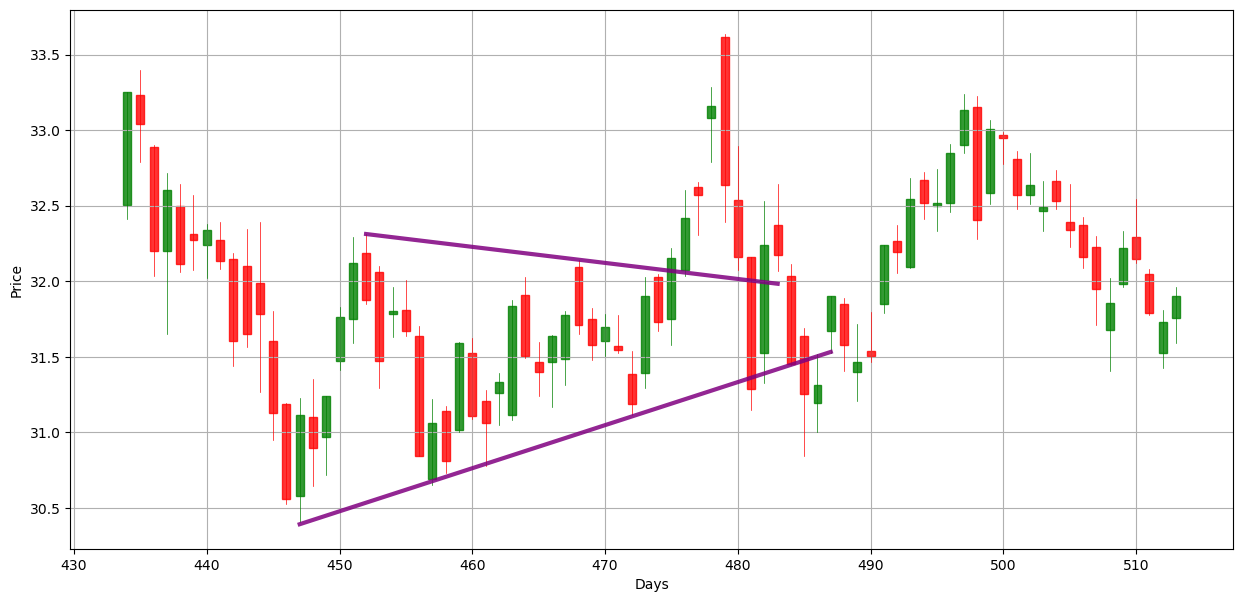

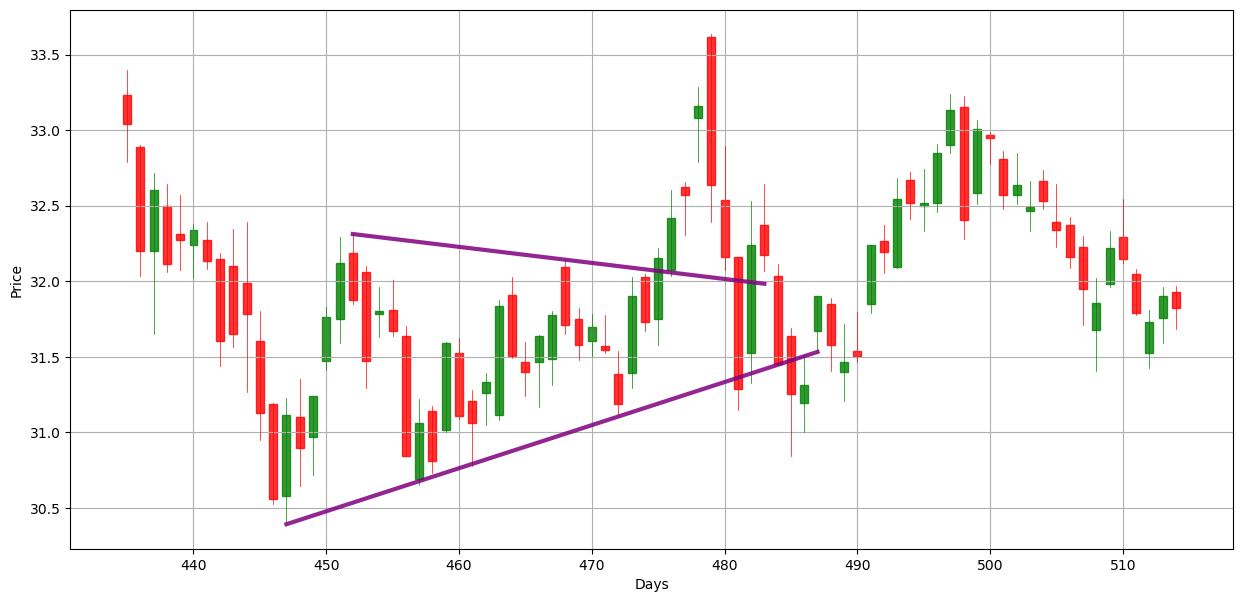

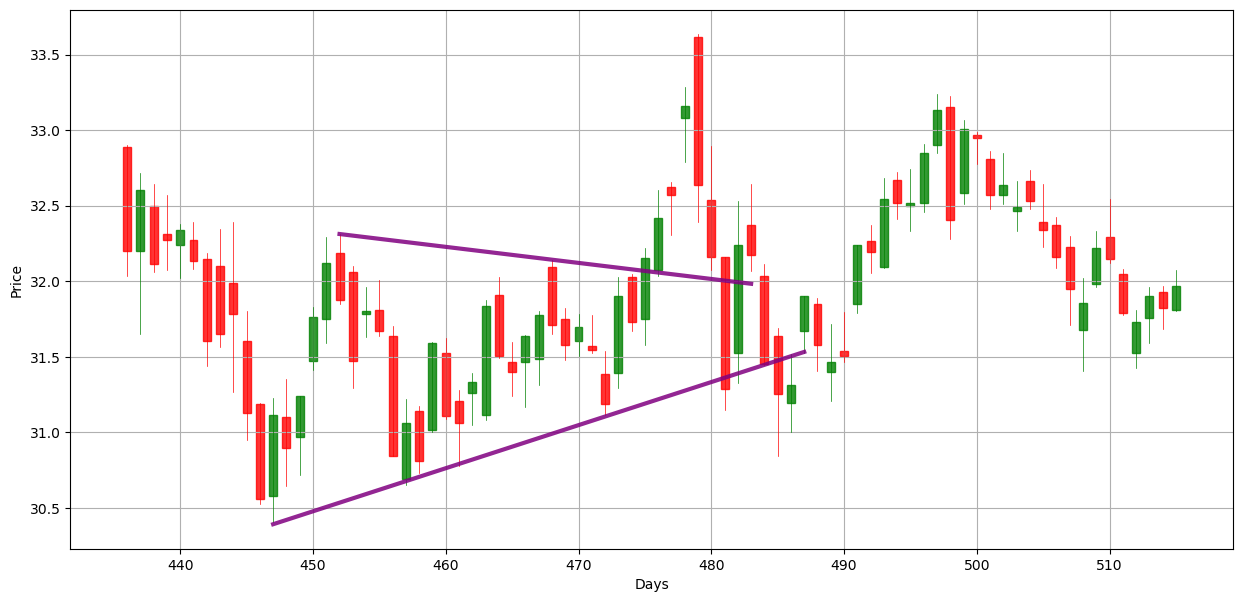

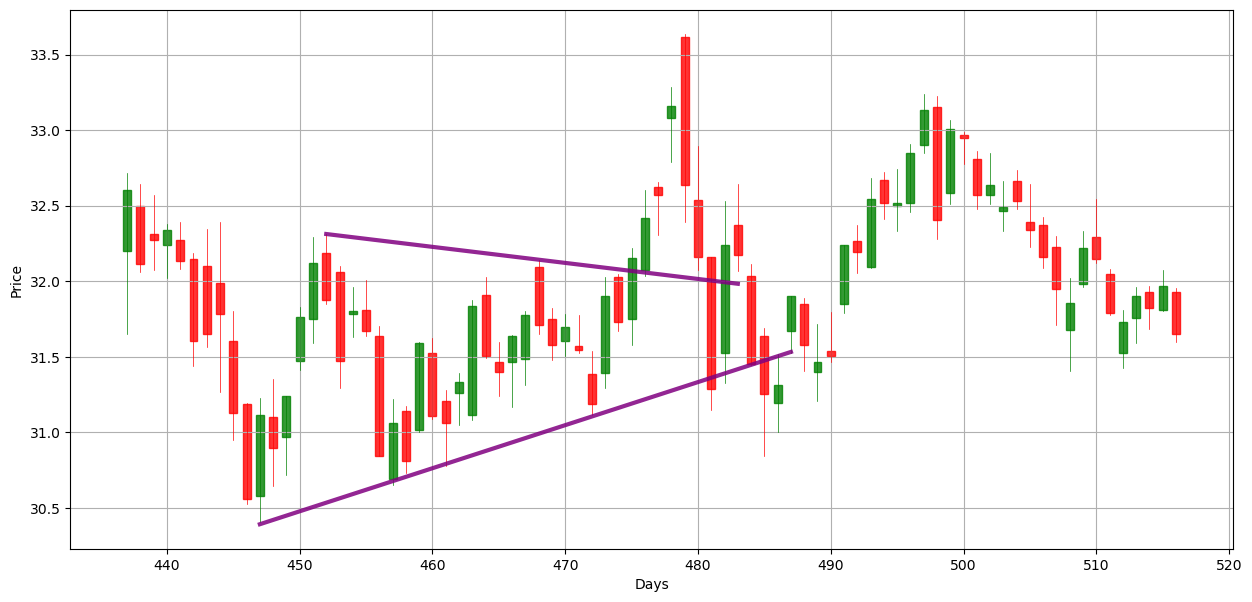

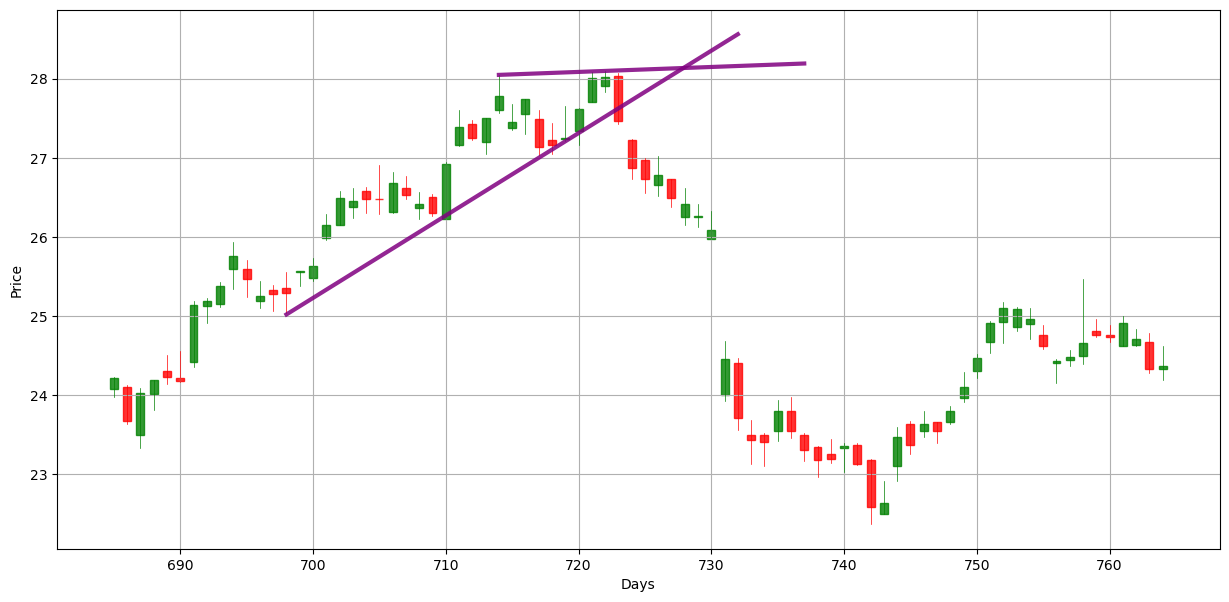

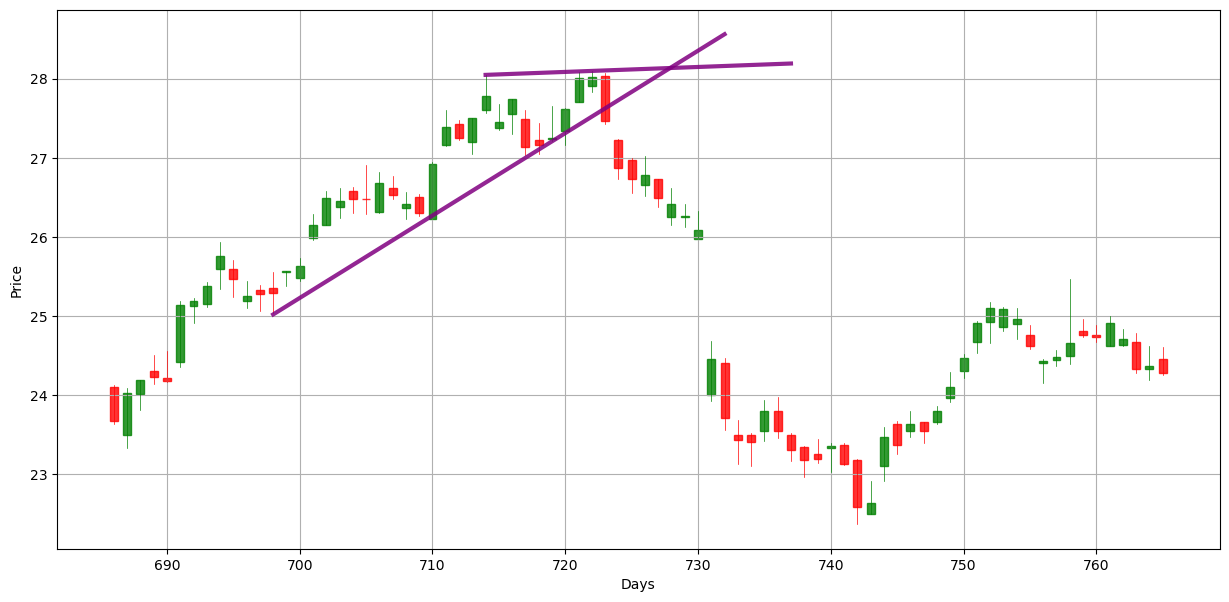

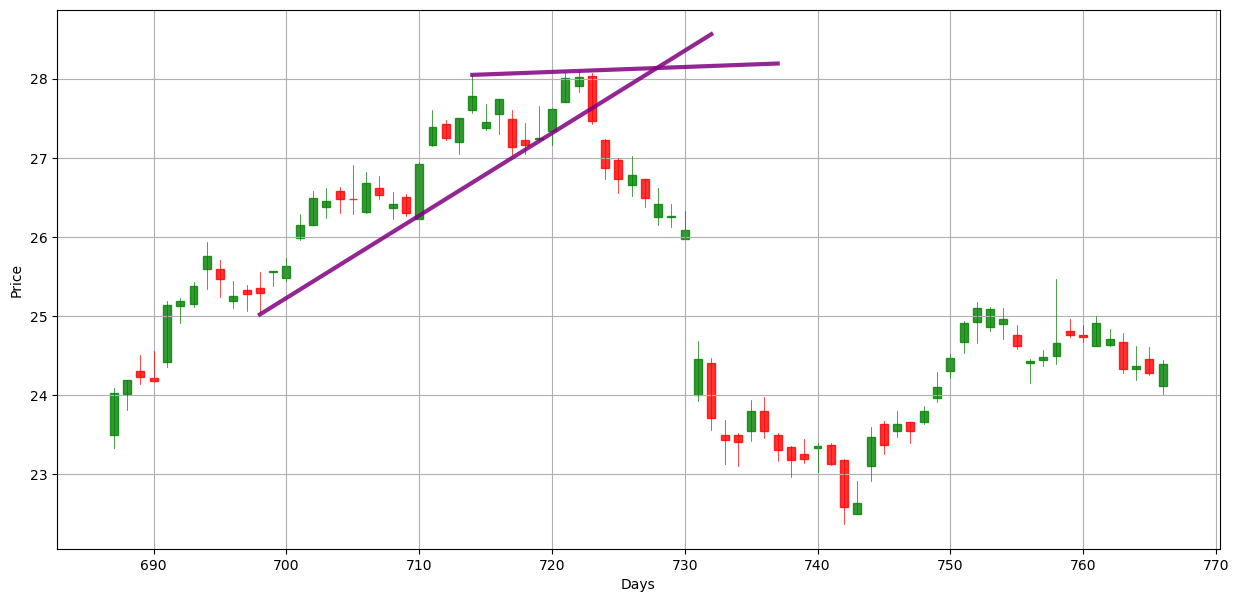

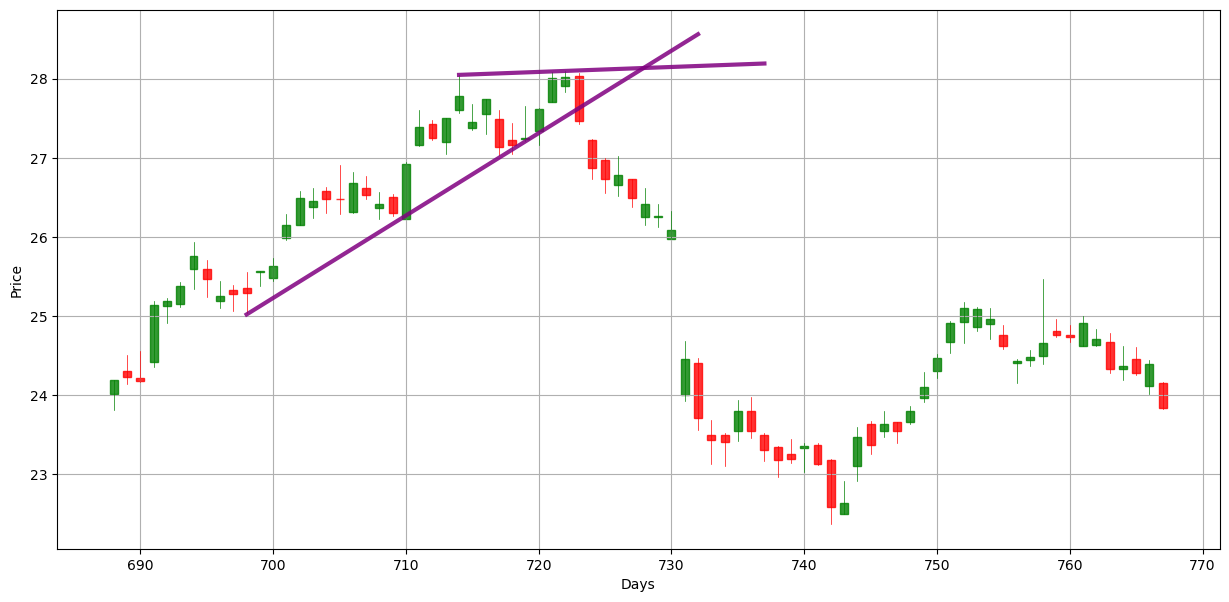

[*********************100%***********************]  1 of 1 completed


C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


[*********************100%***********************]  1 of 1 completed


C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


[*********************100%***********************]  1 of 1 completed


C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


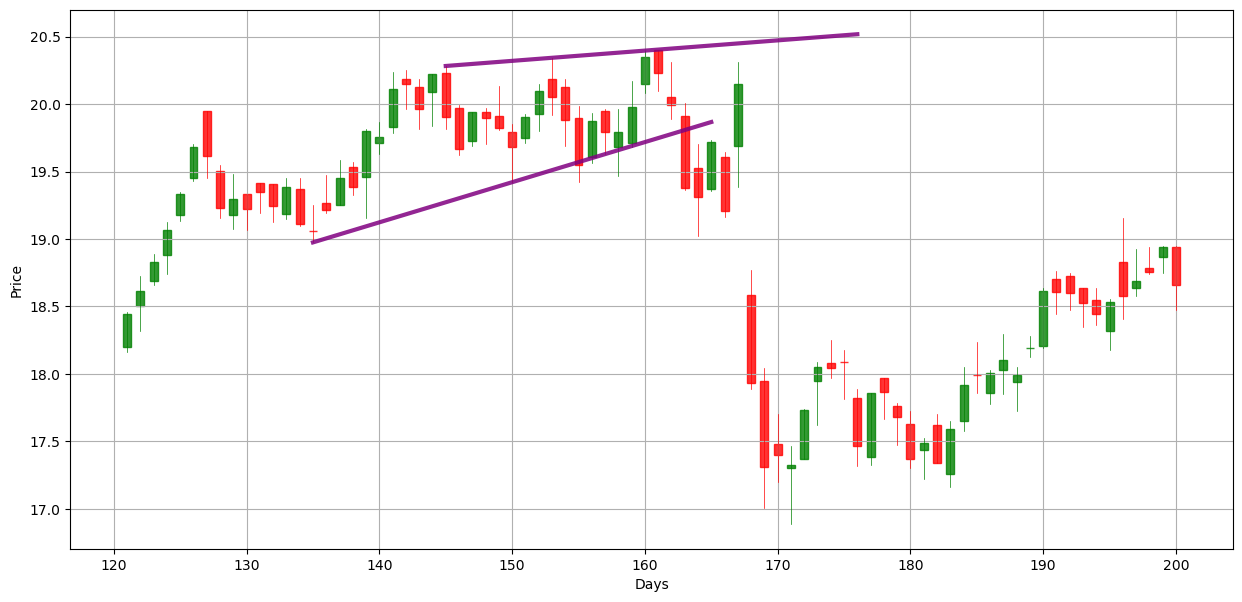

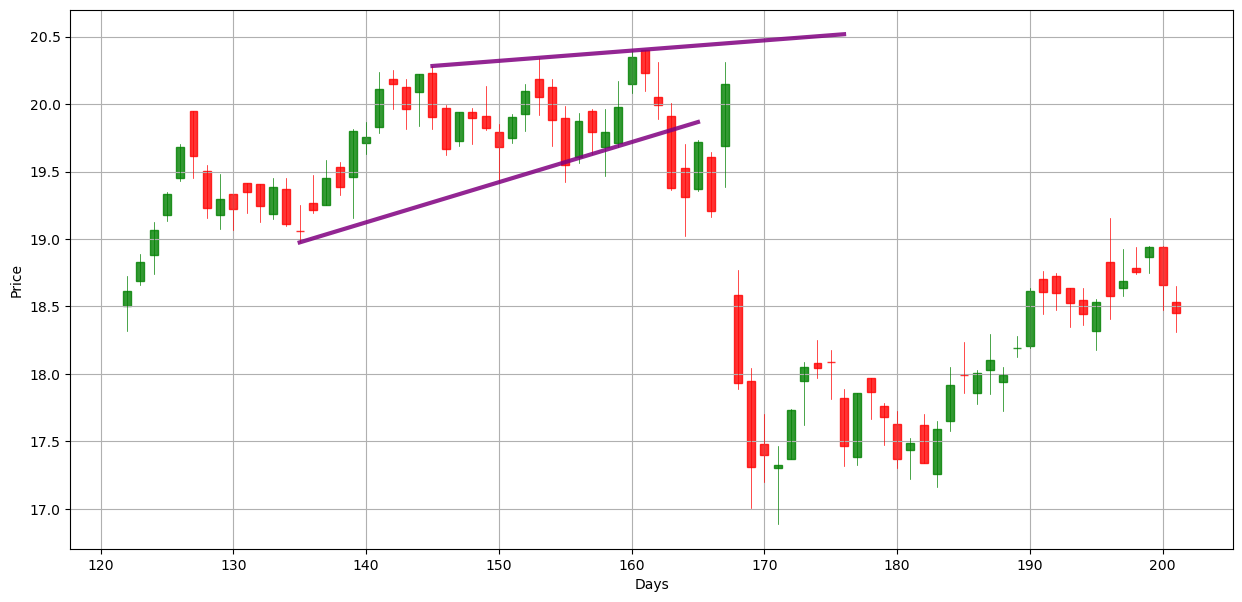

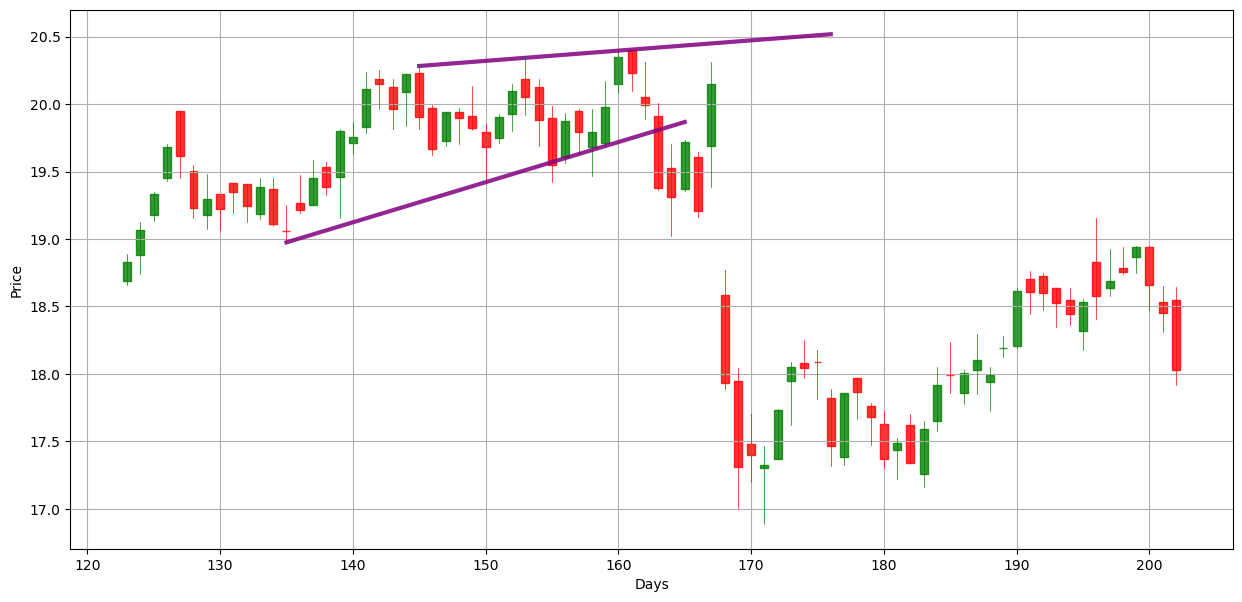

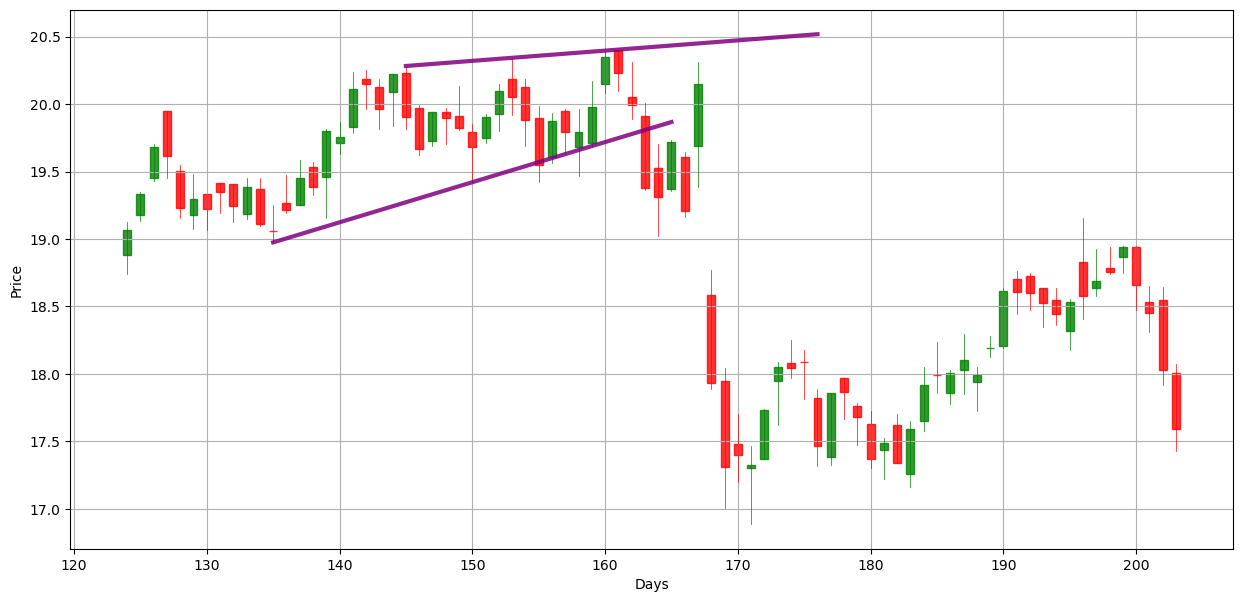

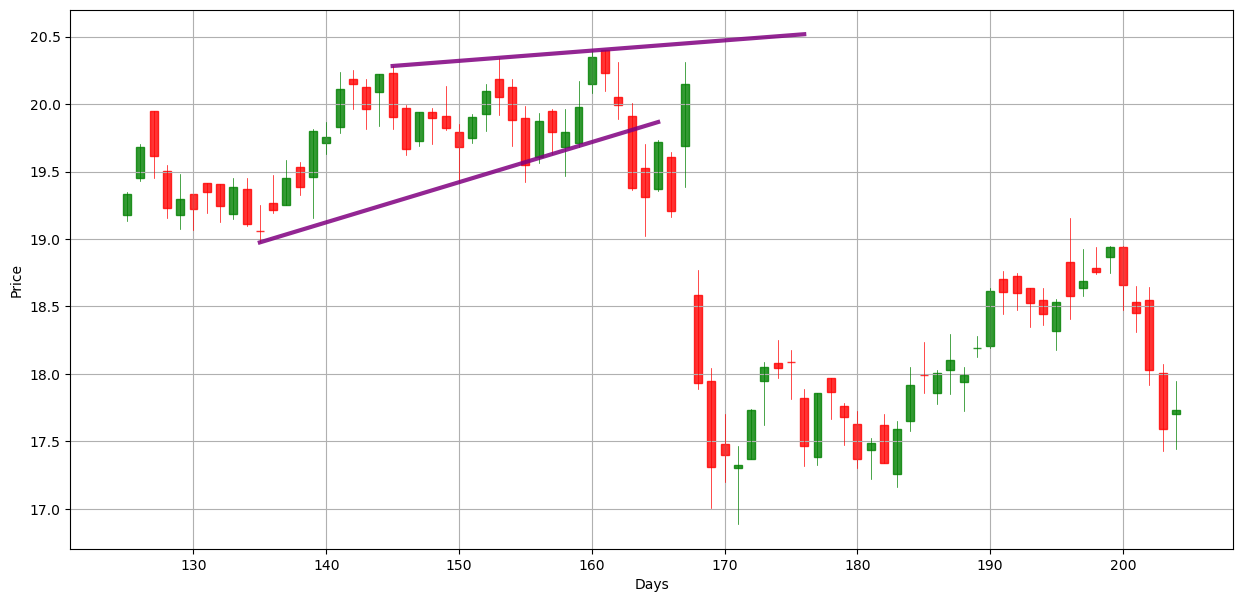

[*********************100%***********************]  1 of 1 completed


C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


[*********************100%***********************]  1 of 1 completed


C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


[*********************100%***********************]  1 of 1 completed


C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


[*********************100%***********************]  1 of 1 completed


C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


[*********************100%***********************]  1 of 1 completed


C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


[*********************100%***********************]  1 of 1 completed


C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [7]:
for i in range(0,10):
    
    stock_data = yf.download(ticker[i],start="2013-06-01",end="2023-06-01")
    df   = stock_data.copy()

    df = df[df['Volume']!=0]
    df.reset_index(drop=True, inplace=True)

    req = df.loc[:, ["Open", "High", "Low", "Close"] ]
    req["Pivot"] = 0

    req["Pivot"]    = req.apply(lambda x: pivot_id(req, x.name, 5, 5), axis=1)
    req["PointPos"] = req.apply(lambda row: pivot_point_position(row), axis=1)
    
    lookback = 30
    triangle_points = find_triangle_points(req, lookback)
    plot_ascending_triangle(req, triangle_points, lookback)

## Bear Flag

In [8]:
def find_flag_points(data, lookback):
    all_points = []
    for candle_idx in range(lookback+10, len(data)):

        maxim = np.array([])
        minim = np.array([])
        xxmin = np.array([])
        xxmax = np.array([])

        for i in range(candle_idx-lookback, candle_idx+1):
            if data.loc[i,"Pivot"] == 1:
                minim = np.append(minim, data.loc[i, "Low"])
                xxmin = np.append(xxmin, i) 
            if data.loc[i,"Pivot"] == 2:
                maxim = np.append(maxim, data.loc[i,"High"])
                xxmax = np.append(xxmax, i)
 
        if (xxmax.size <3 and xxmin.size <3) or xxmax.size==0 or xxmin.size==0:       
            continue
          
        slmin, intercmin, rmin, pmin, semin = linregress(xxmin, minim)
        slmax, intercmax, rmax, pmax, semax = linregress(xxmax, maxim)

        if abs(rmax)>=0.9 and abs(rmin)>=0.9 and (slmin>=1e-3 and slmax>=1e-3 ) or (slmin<=-1e-3 and slmax<=-1e-3):
                        if (slmin/slmax > 0.9 and slmin/slmax < 1.05):
                            all_points.append(candle_idx)
                            

    return all_points


In [9]:
def plot_bear_flag(data, all_points, back_candles):

    total = len(all_points)
    for j, point in enumerate(all_points):

        maxim = np.array([])
        minim = np.array([])
        xxmin = np.array([])
        xxmax = np.array([])

       
        for i in range(point-back_candles, point+1):
            if data.loc[i,"Pivot"] == 1:
                minim = np.append(minim, data.loc[i, "Low"])
                xxmin = np.append(xxmin, i) 
                
            if data.loc[i,"Pivot"] == 2:
                maxim = np.append(maxim, data.loc[i,"High"])
                xxmax = np.append(xxmax, i)

        idx     = range(point-back_candles-5,point-back_candles)
        xslope  = np.array([])
        values  = np.array([])

        for i in idx:
            xslope = np.append(xslope,i)
            values = np.append(values, data.loc[i,"Close"])

        sl, interm, r, p, se = linregress(xslope, values)
        slmin, intercmin, rmin, pmin, semin = linregress(xxmin, minim)
        slmax, intercmax, rmax, pmax, semax = linregress(xxmax, maxim)

        xxmin = np.append(xxmin, xxmin[-1]) 
        xxmax = np.append(xxmax, xxmax[-1])

        data_subset = data[point-back_candles-5:point+back_candles+5]
        data_subset_copy = data_subset.copy()
        data_subset_copy.loc[:,"Index"] = data_subset_copy.index
        
        xxmin = np.append(xxmin, xxmin[-1]+15)
        xxmax = np.append(xxmax, xxmax[-1]+15)


        if sl < 0 and slmin > 0 and slmax > 0:
            fig, ax = plt.subplots(figsize=(15,7))
            
            candlestick_ohlc(ax, data_subset_copy.loc[:, ["Index","Open", "High", "Low", "Close"] ].values, width=0.6, colorup='green', colordown='red', alpha=0.8)

            ax.plot(xxmin, xxmin*slmin + intercmin)
            ax.plot(xxmax, xxmax*slmax + intercmax)
            ax.plot(xslope, sl*xslope + interm, color="magenta", linewidth=3)
            ax.grid(True)
            ax.set_xlabel('Index')
            ax.set_ylabel('Price')
            plt.show()

    return

[*********************100%***********************]  1 of 1 completed


C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


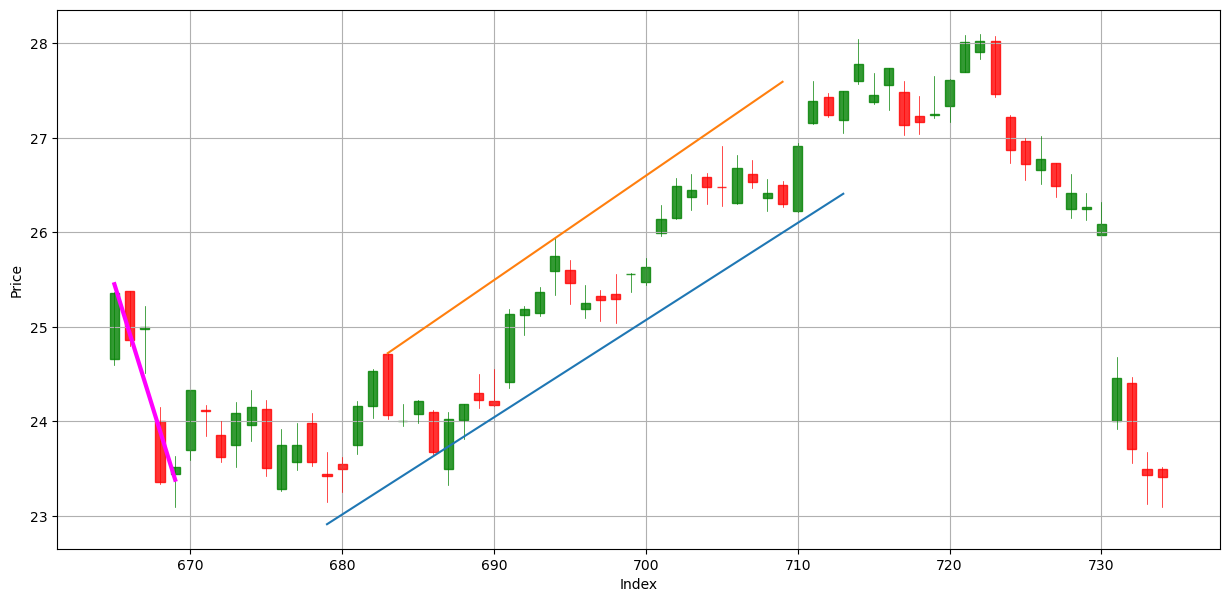

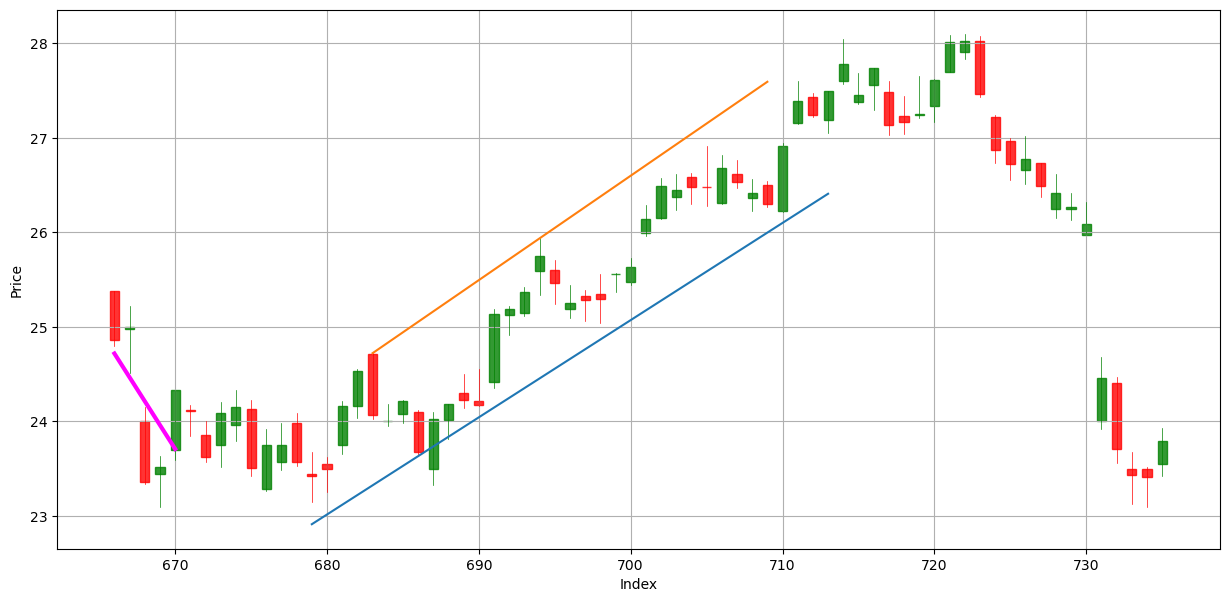

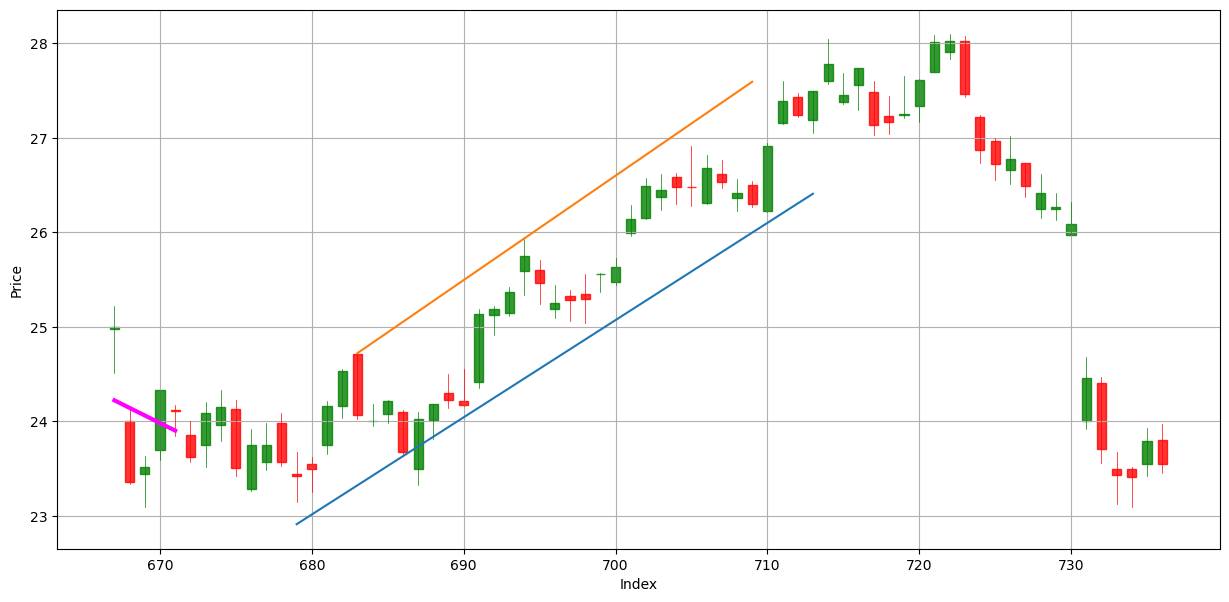

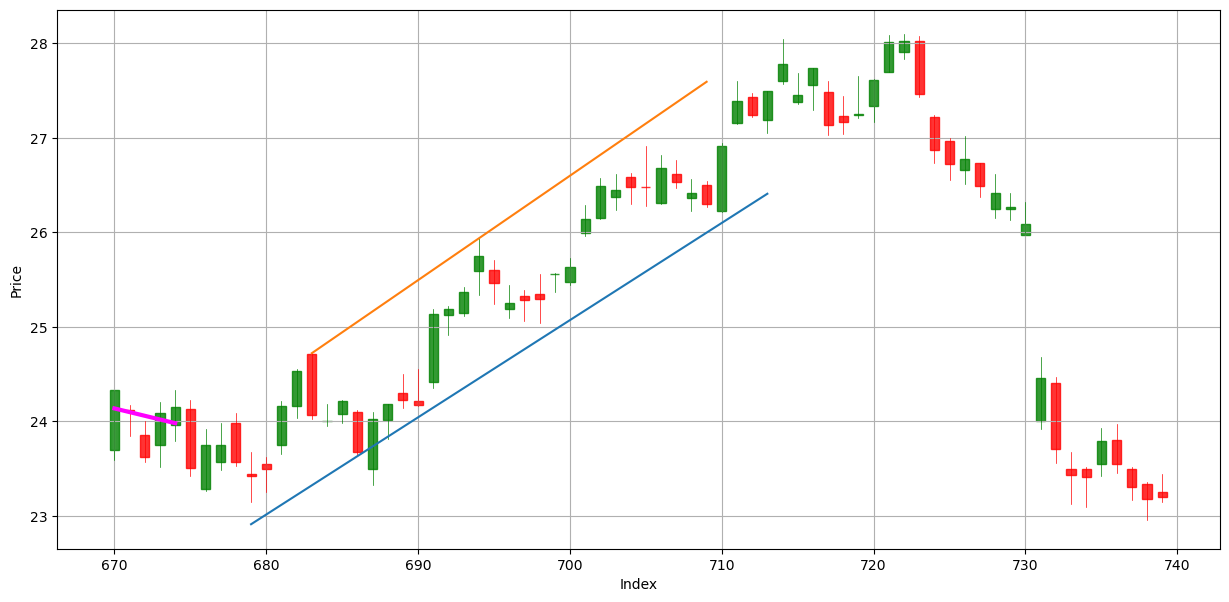

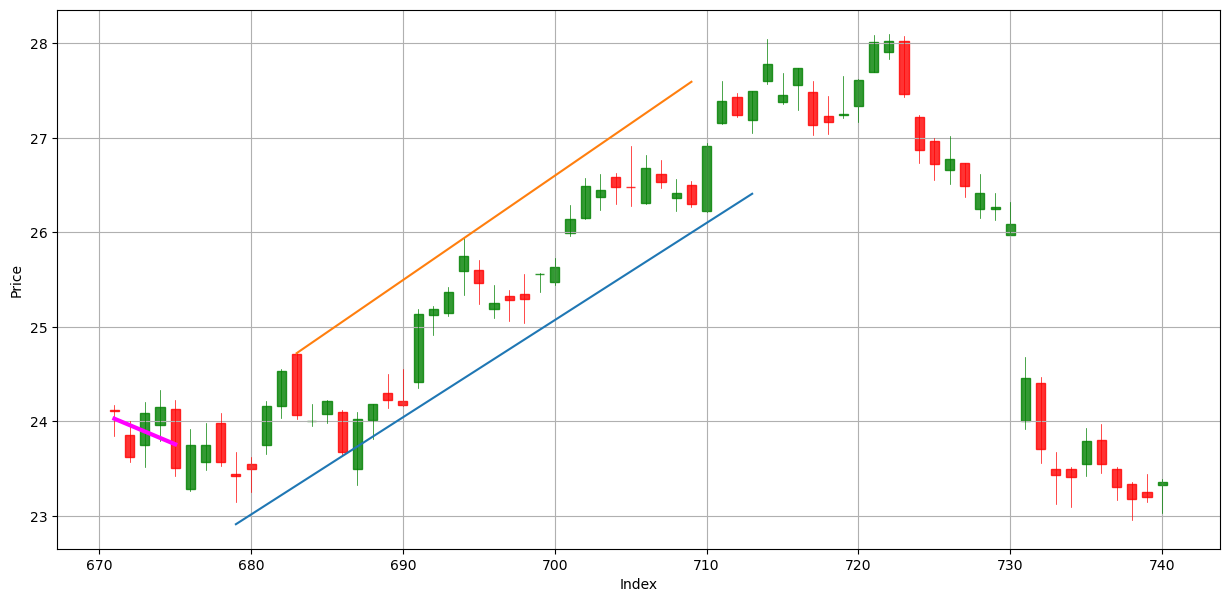

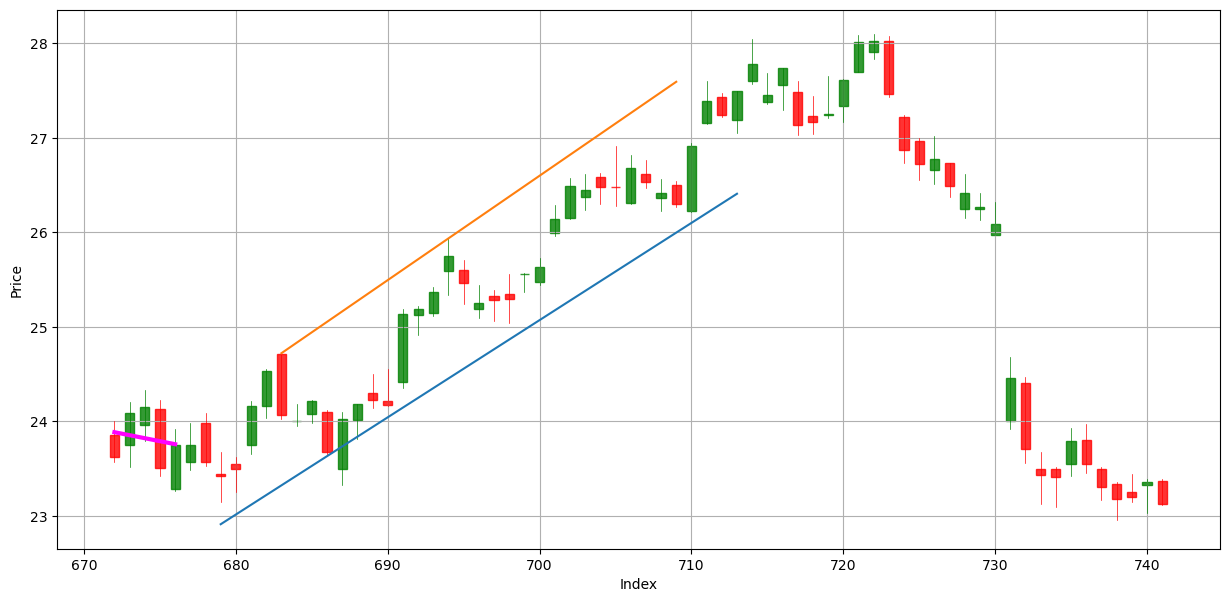

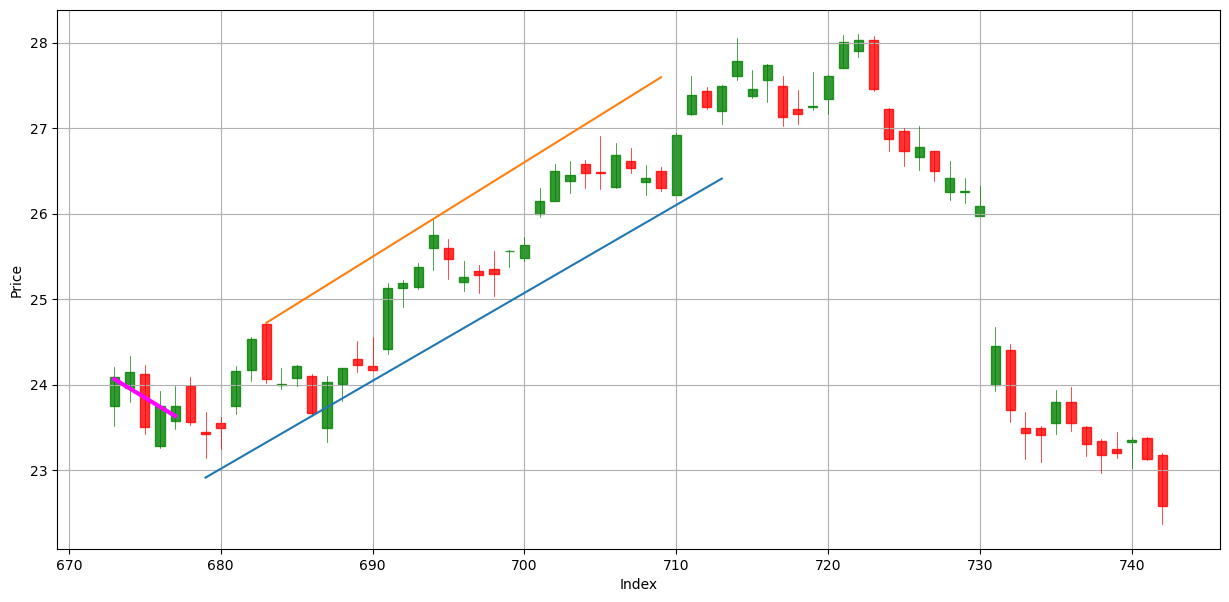

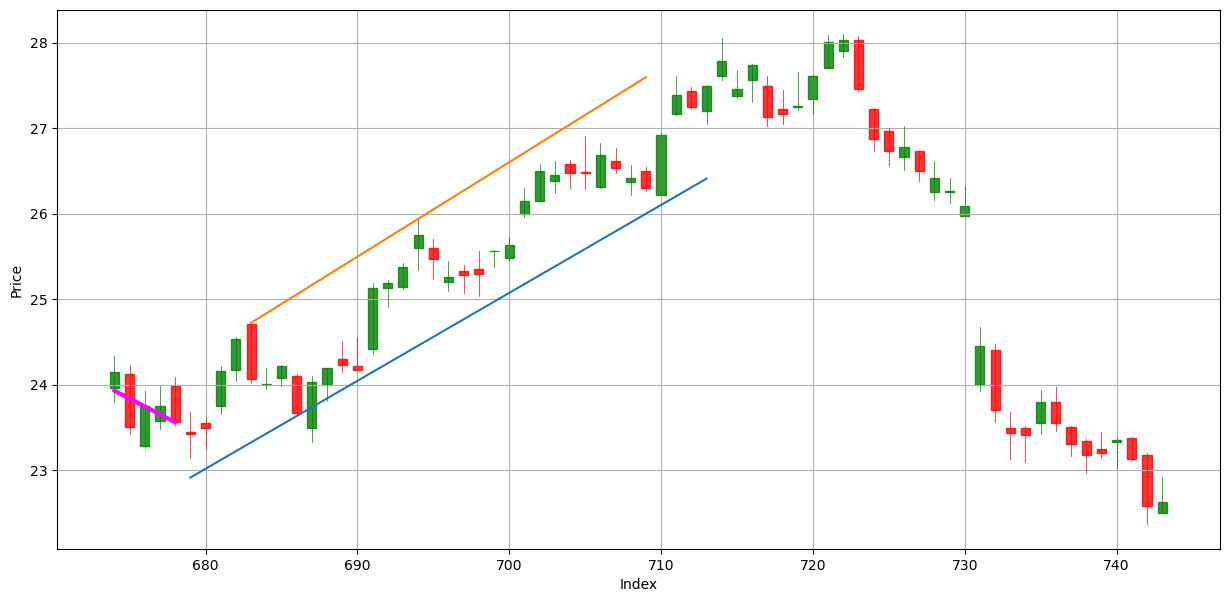

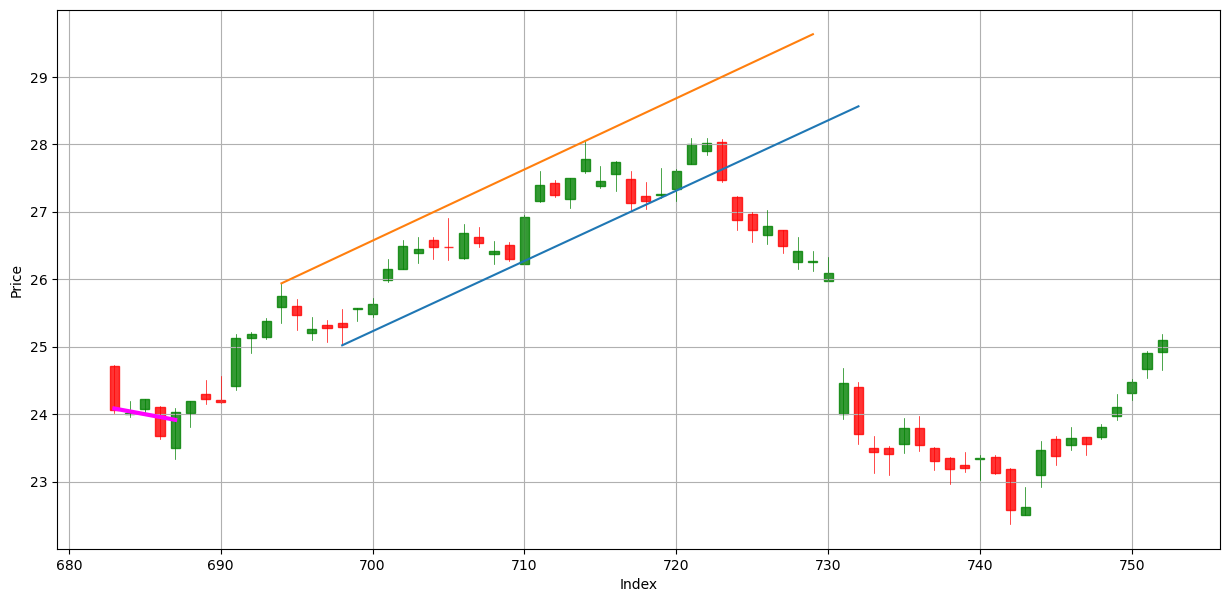

[*********************100%***********************]  1 of 1 completed


C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


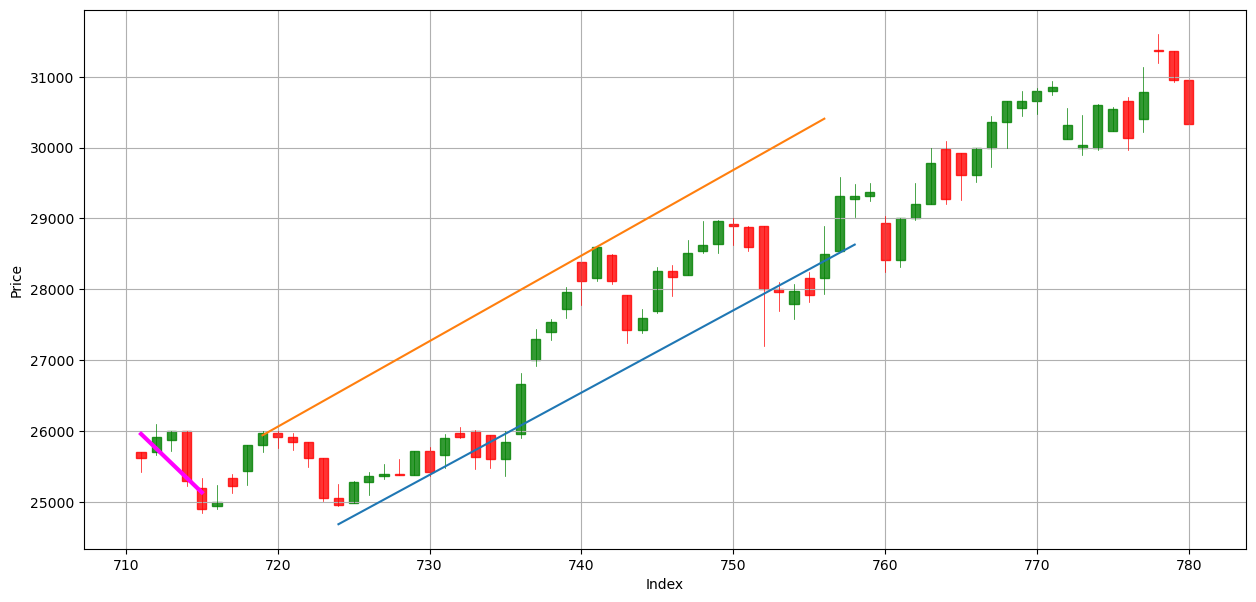

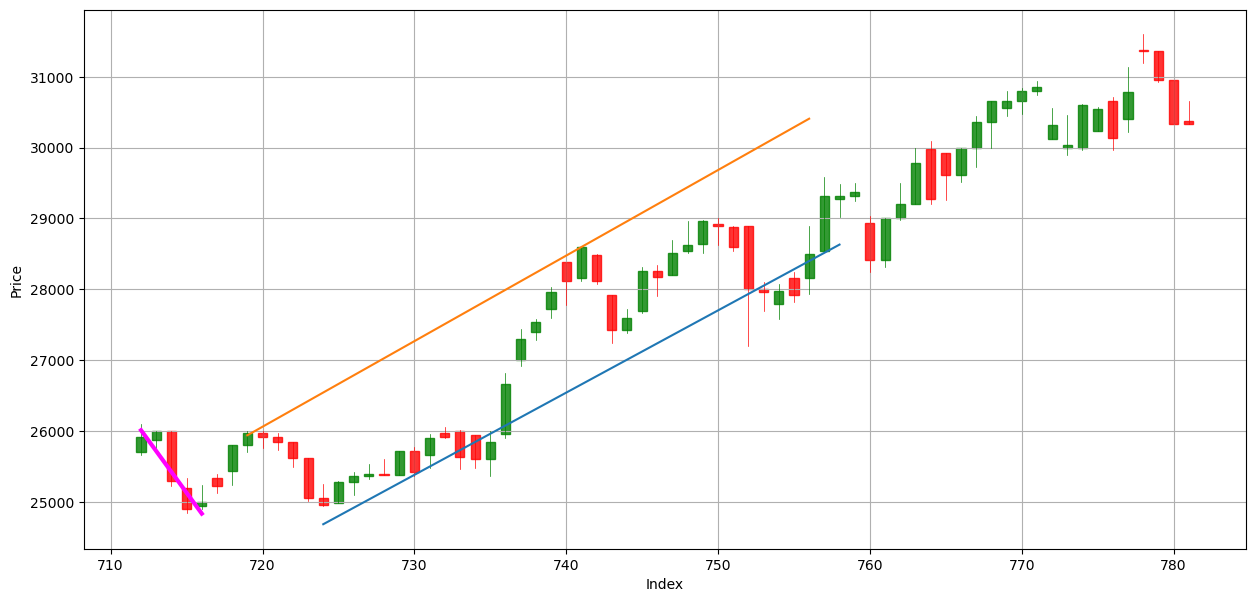

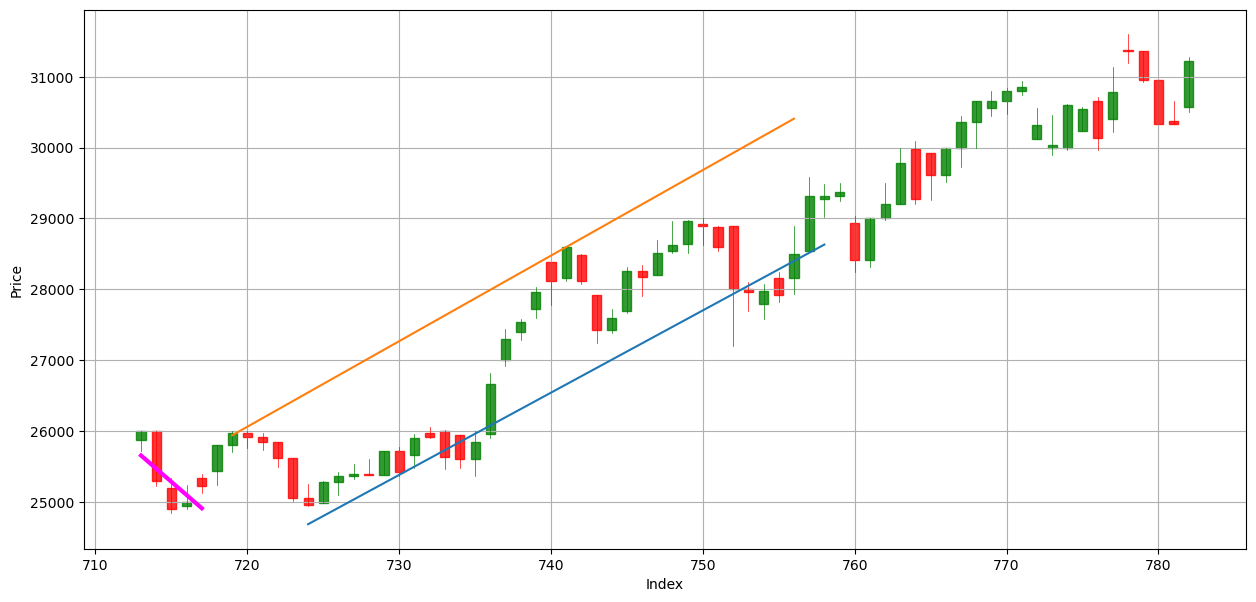

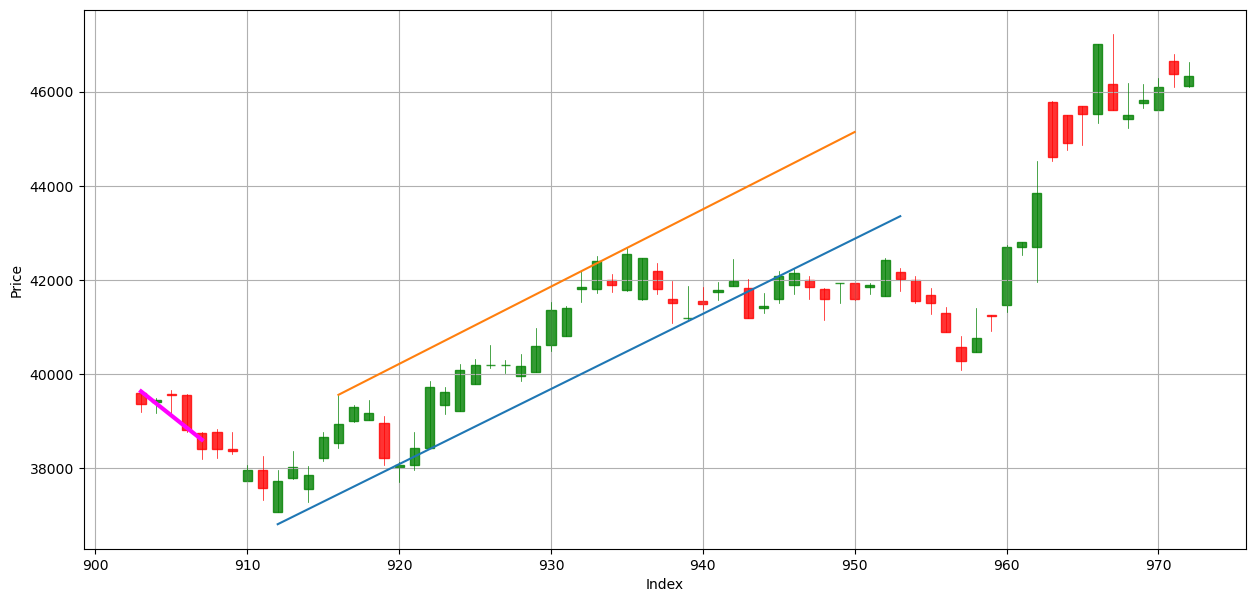

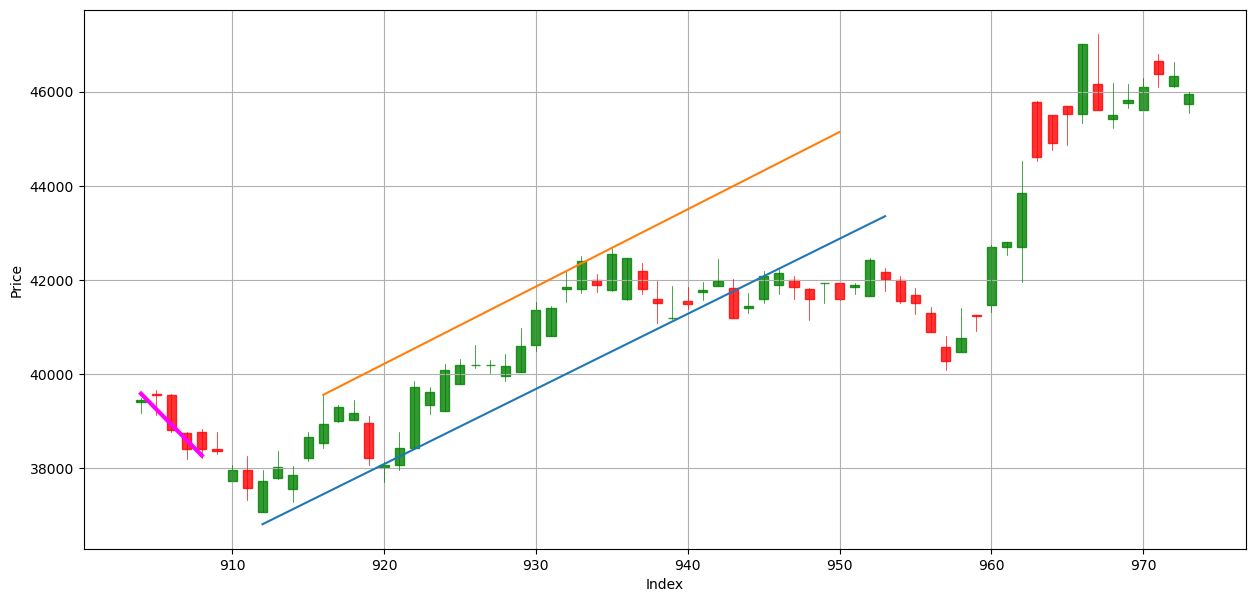

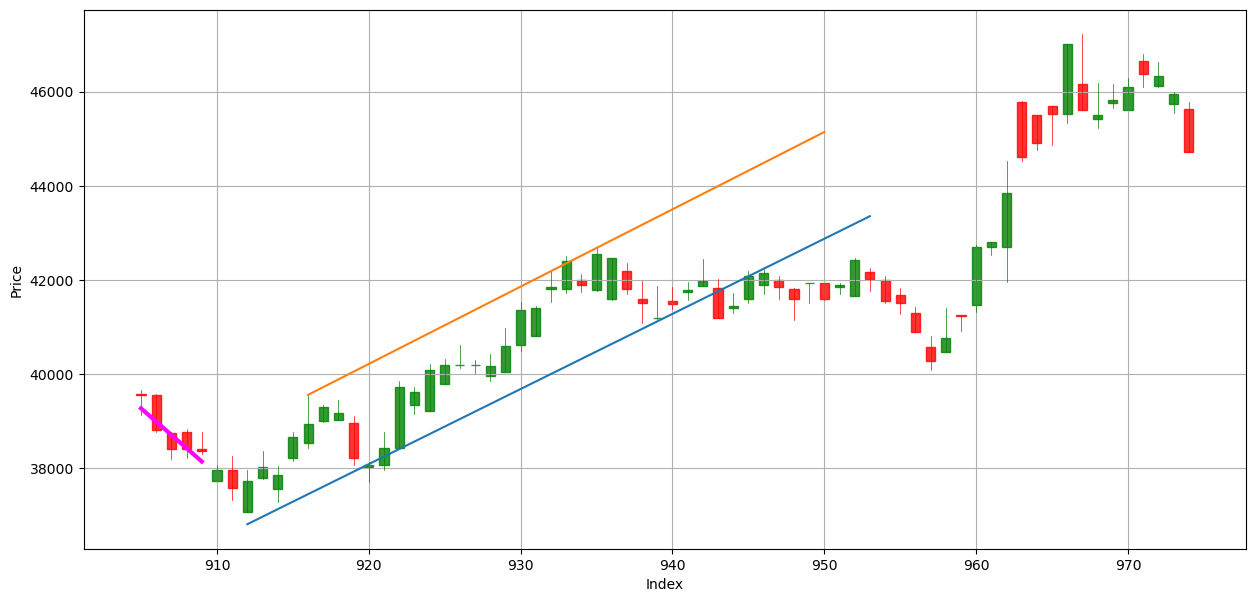

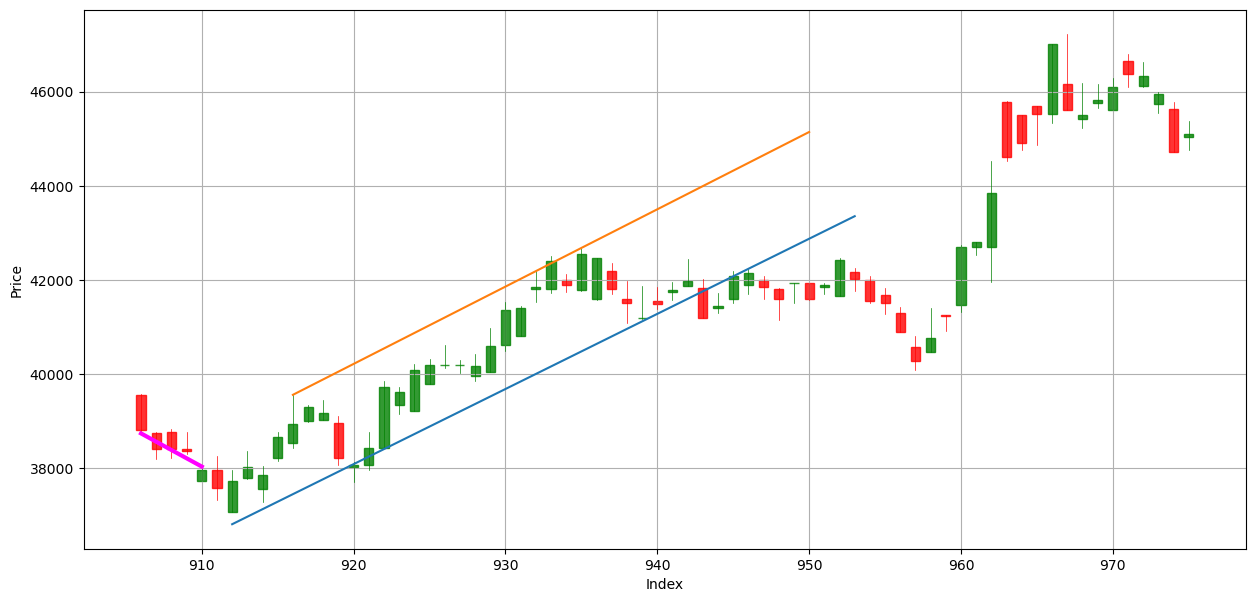

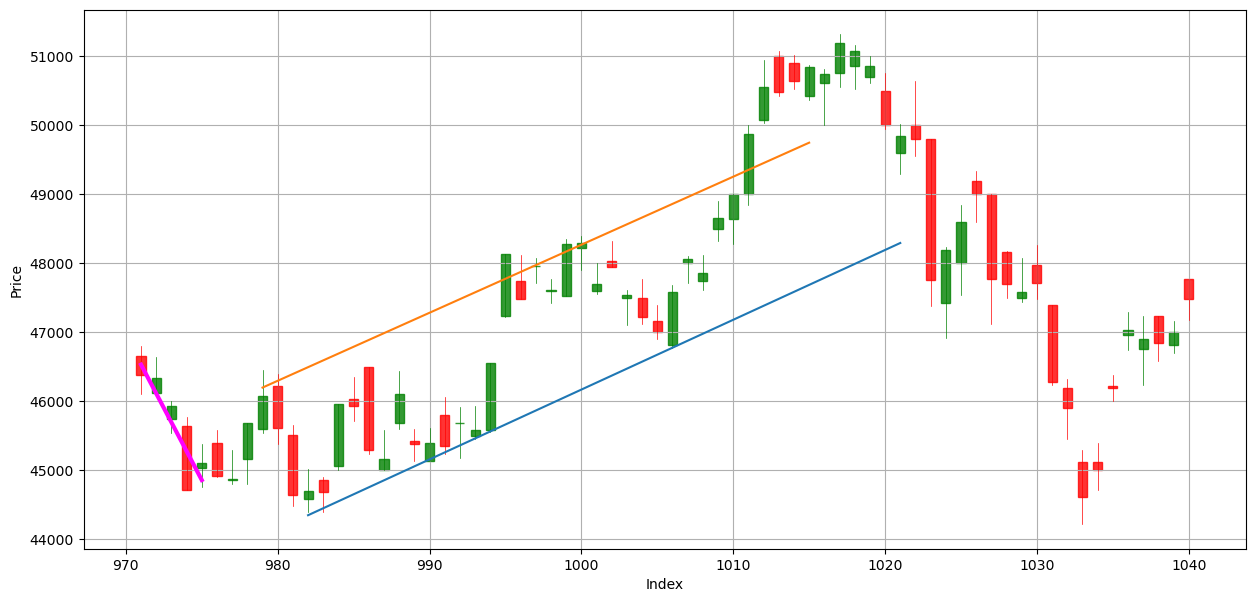

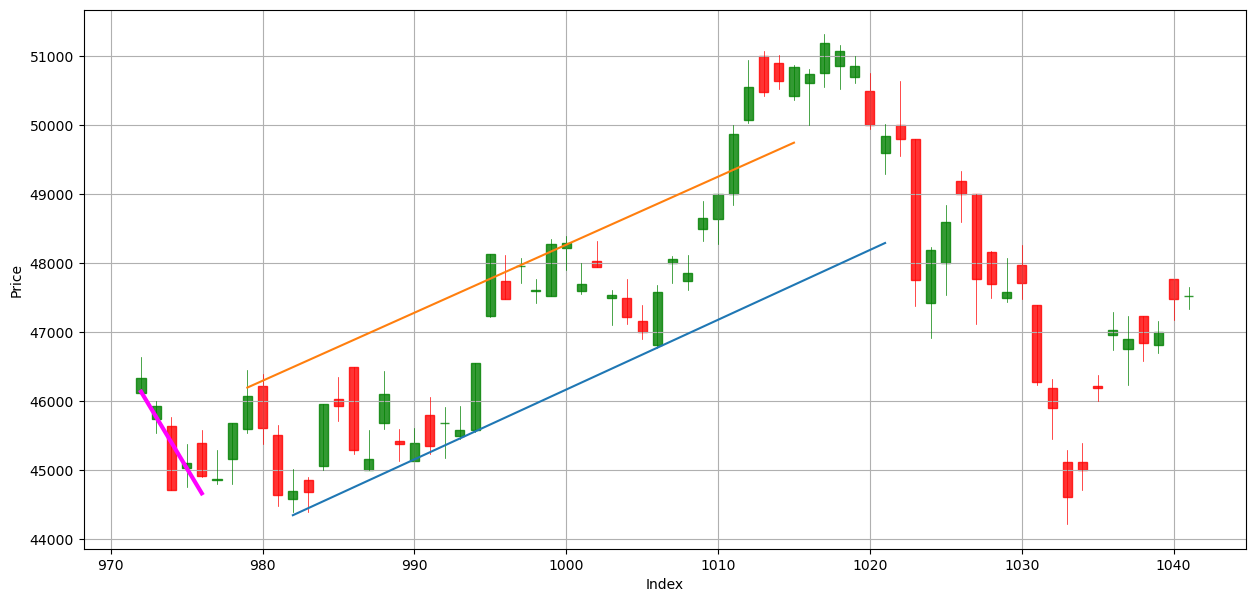

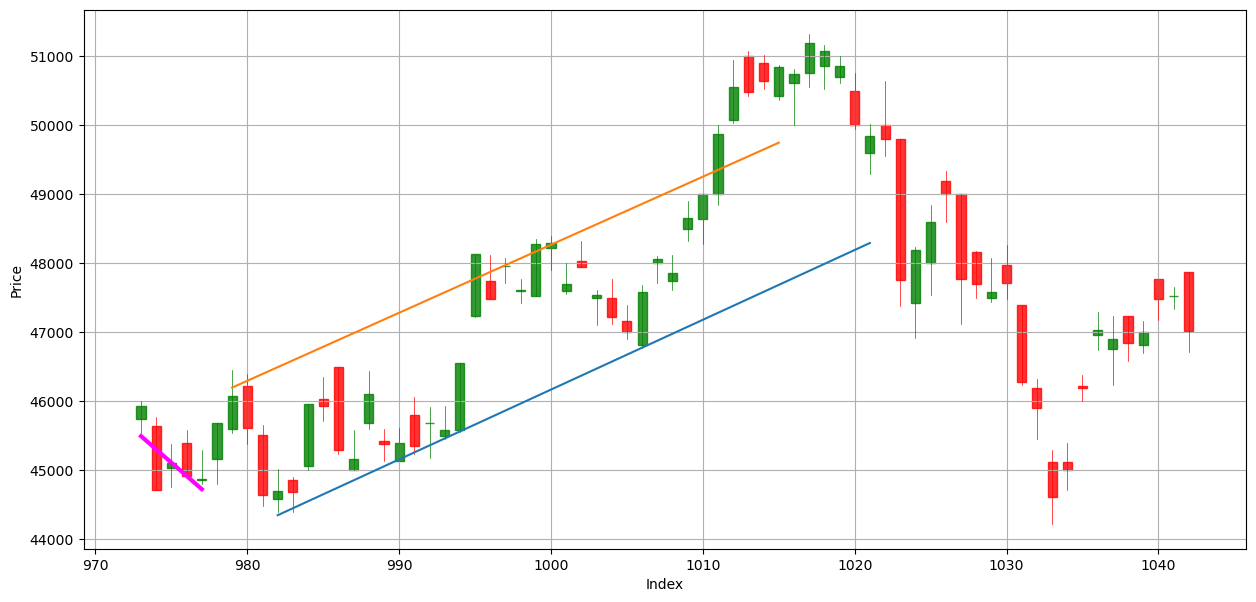

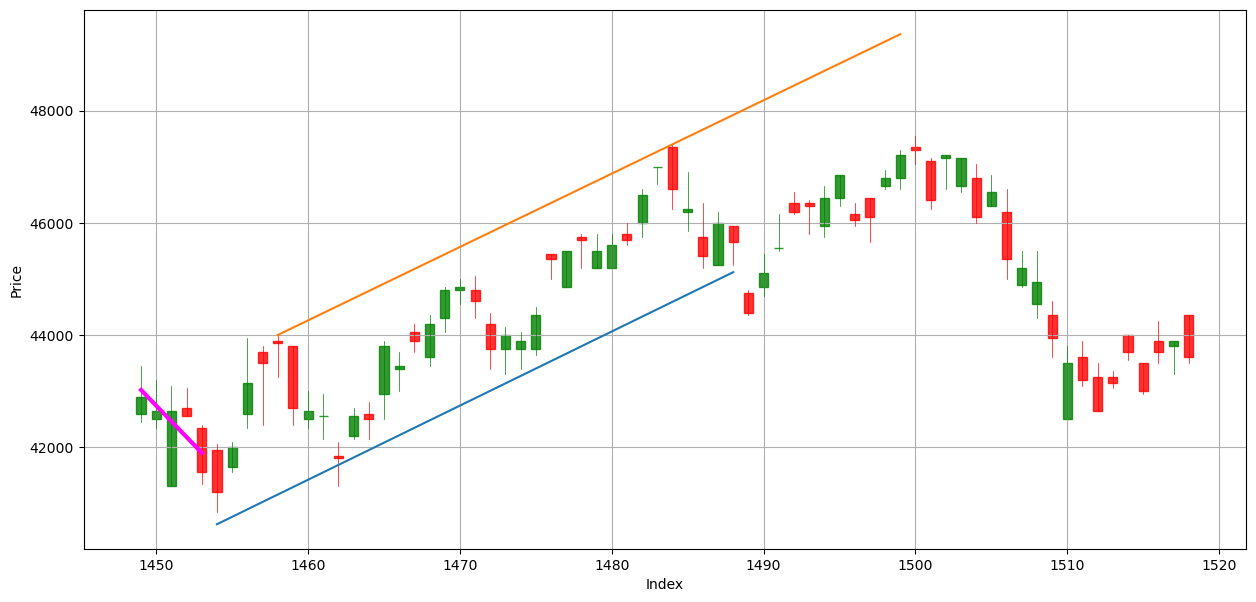

[*********************100%***********************]  1 of 1 completed


C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


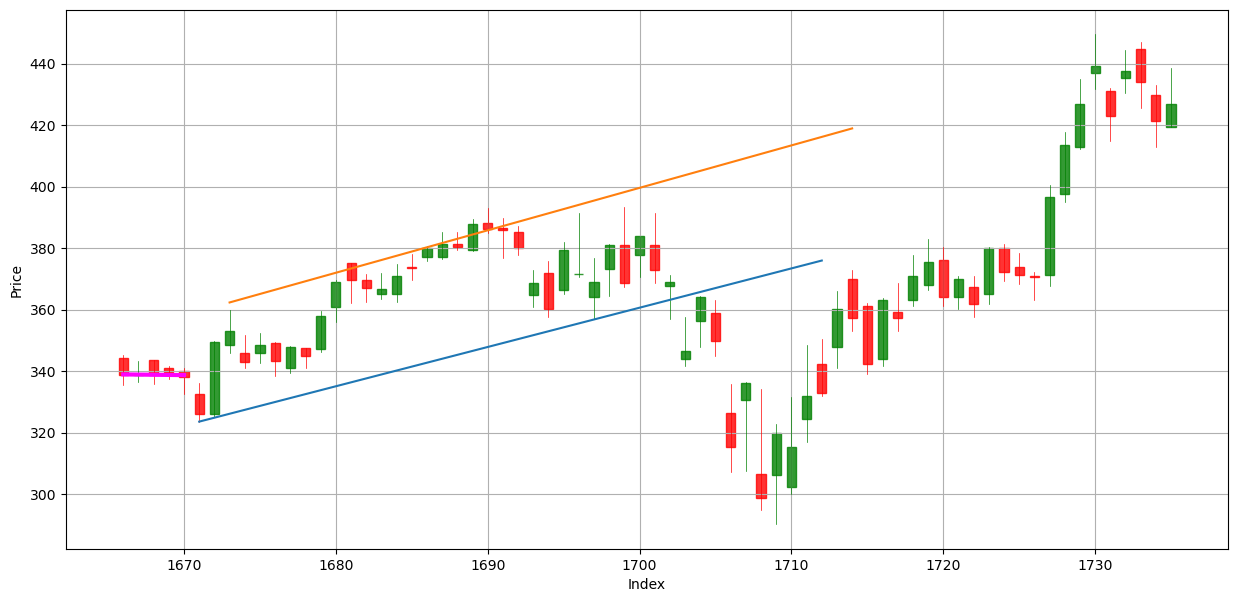

[*********************100%***********************]  1 of 1 completed


C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


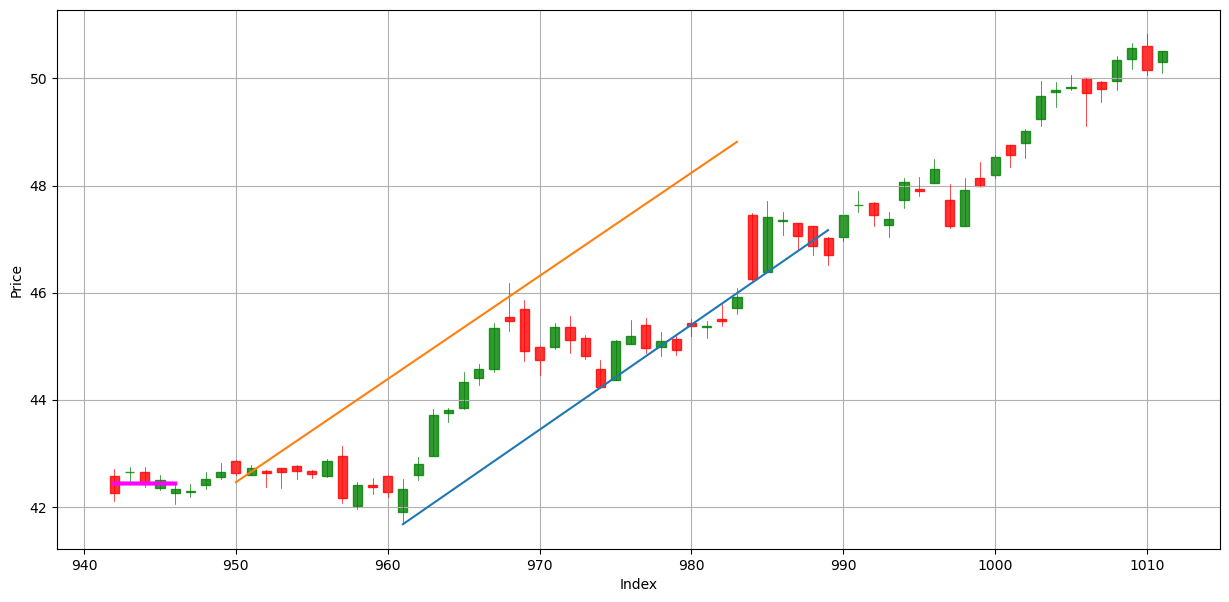

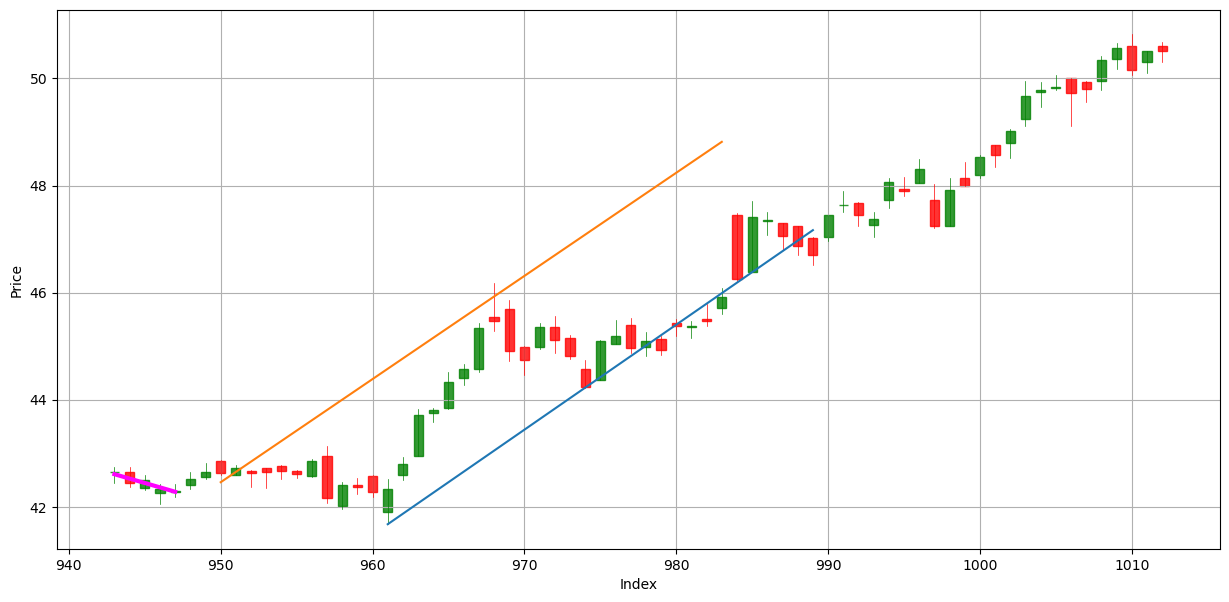

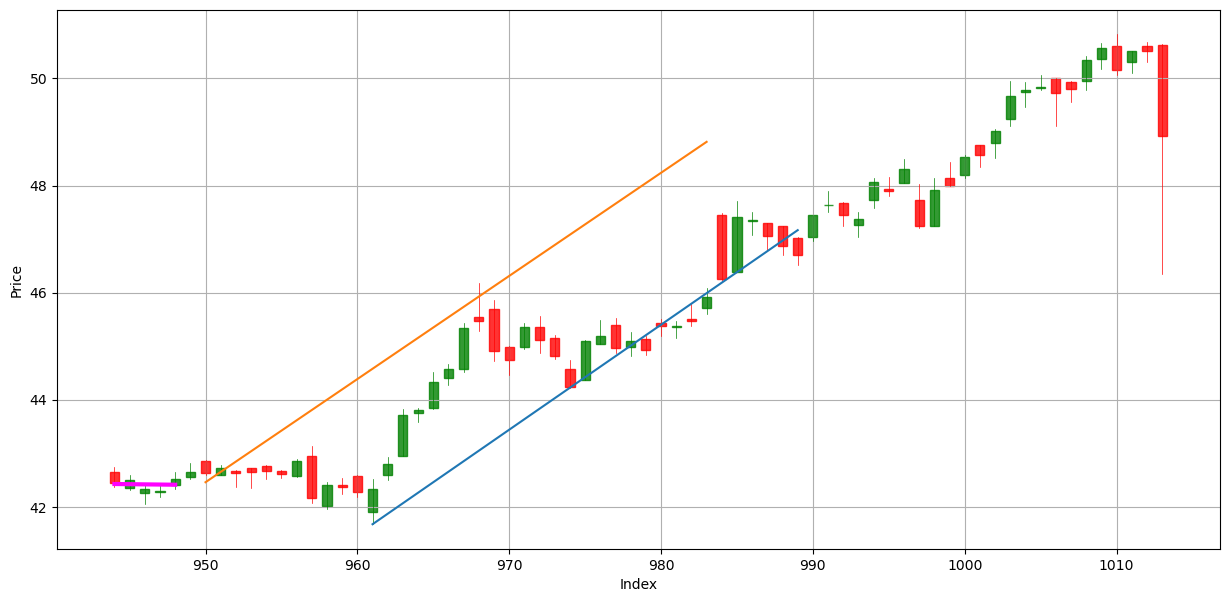

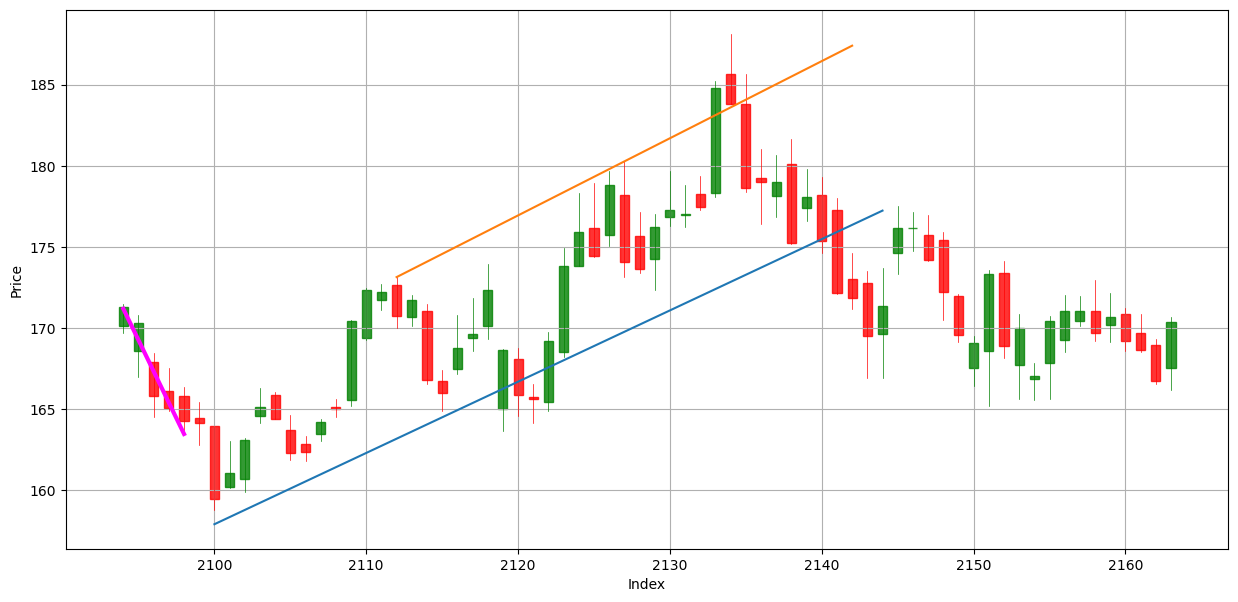

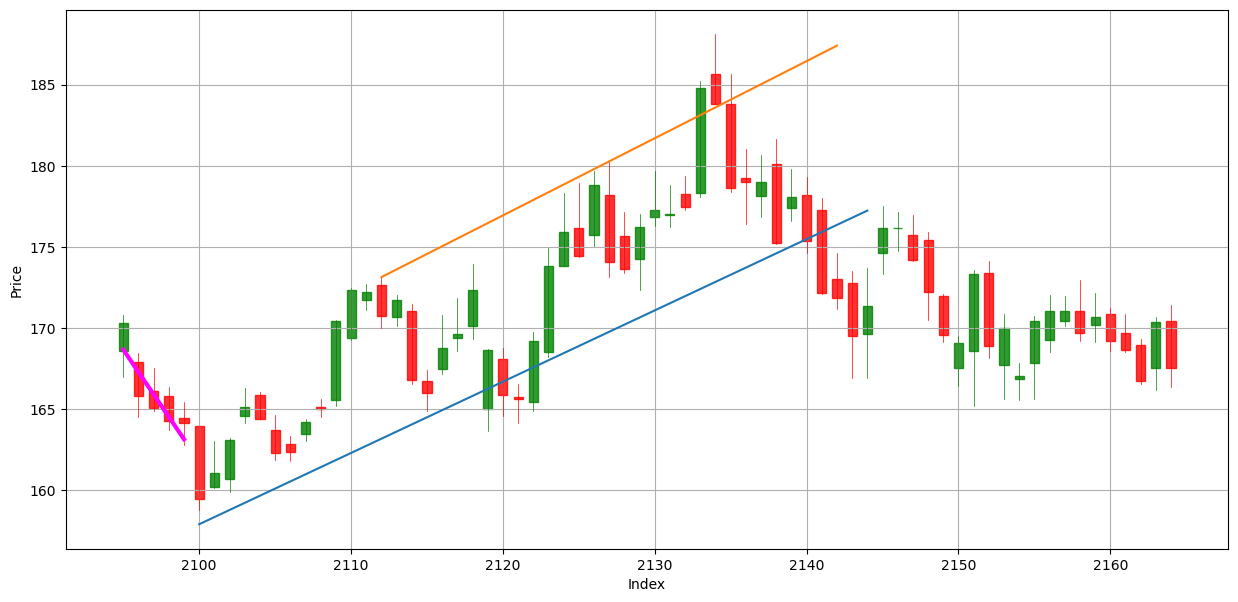

[*********************100%***********************]  1 of 1 completed


C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


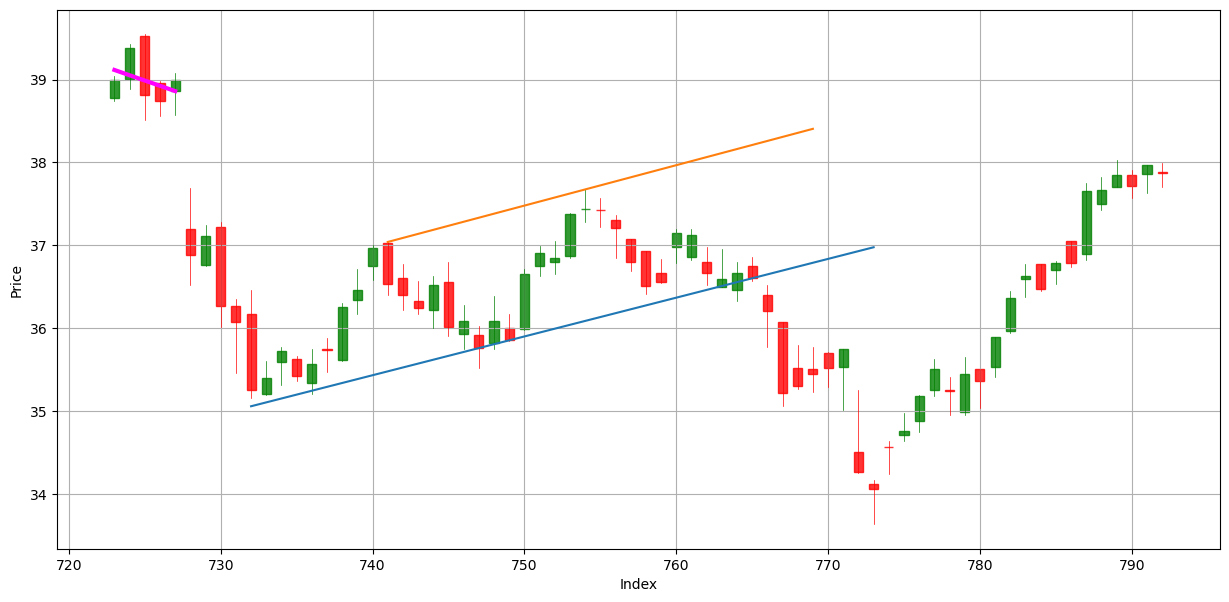

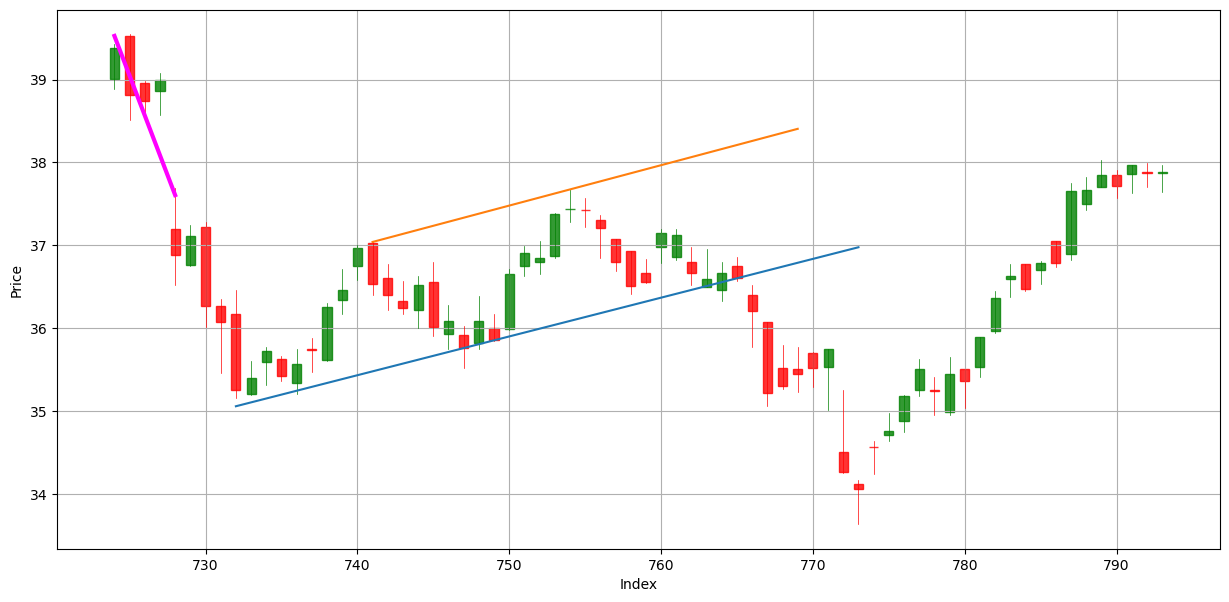

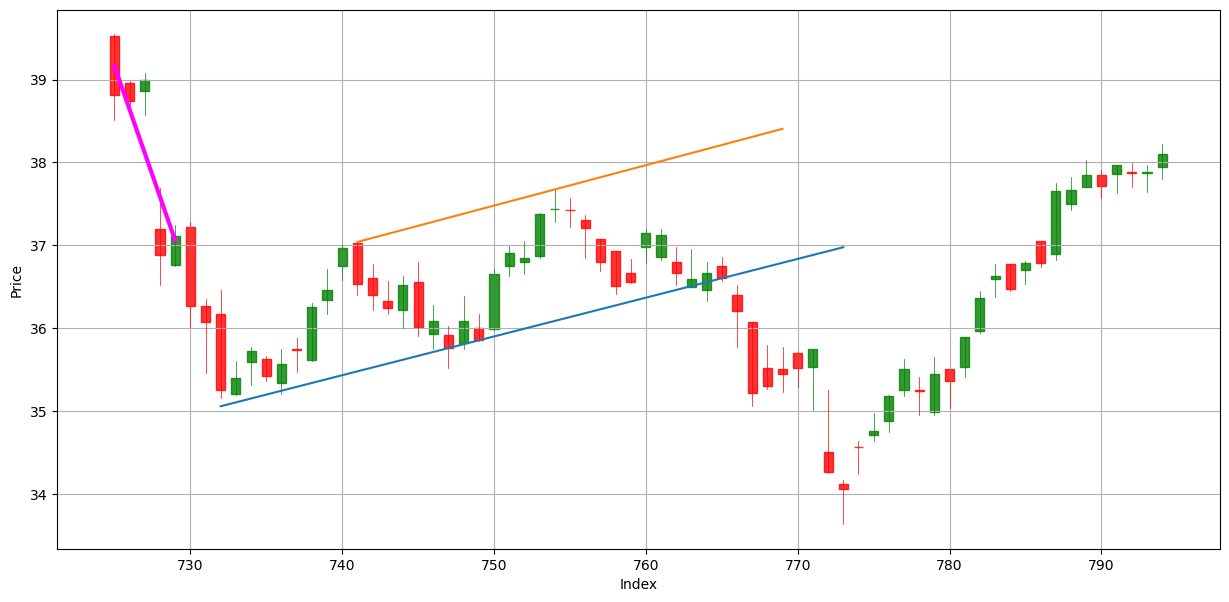

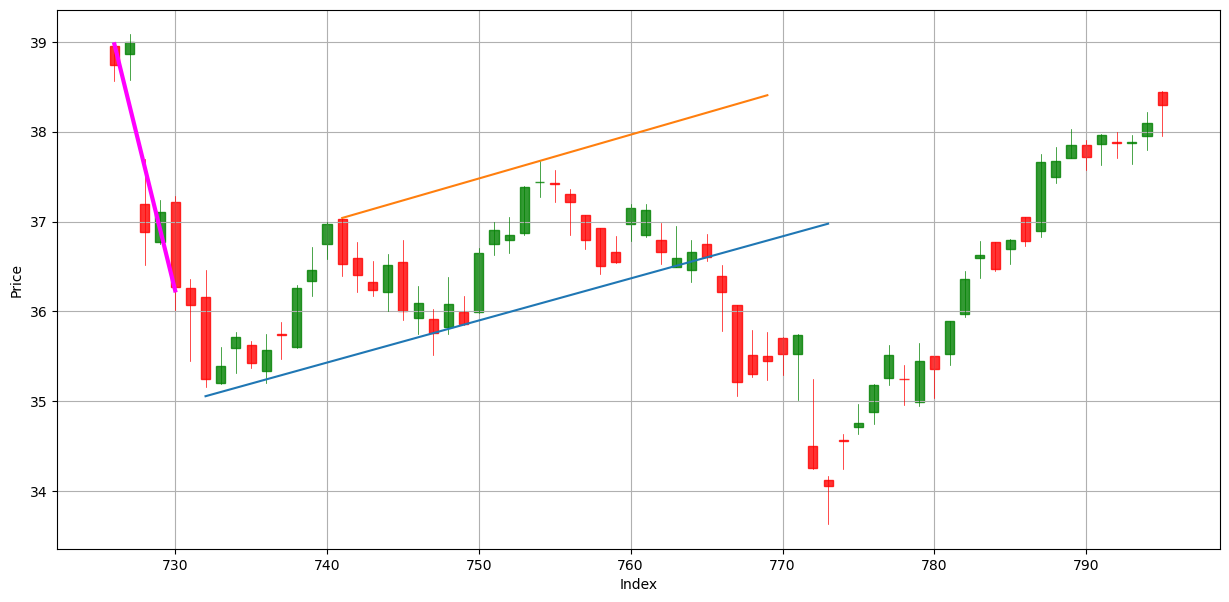

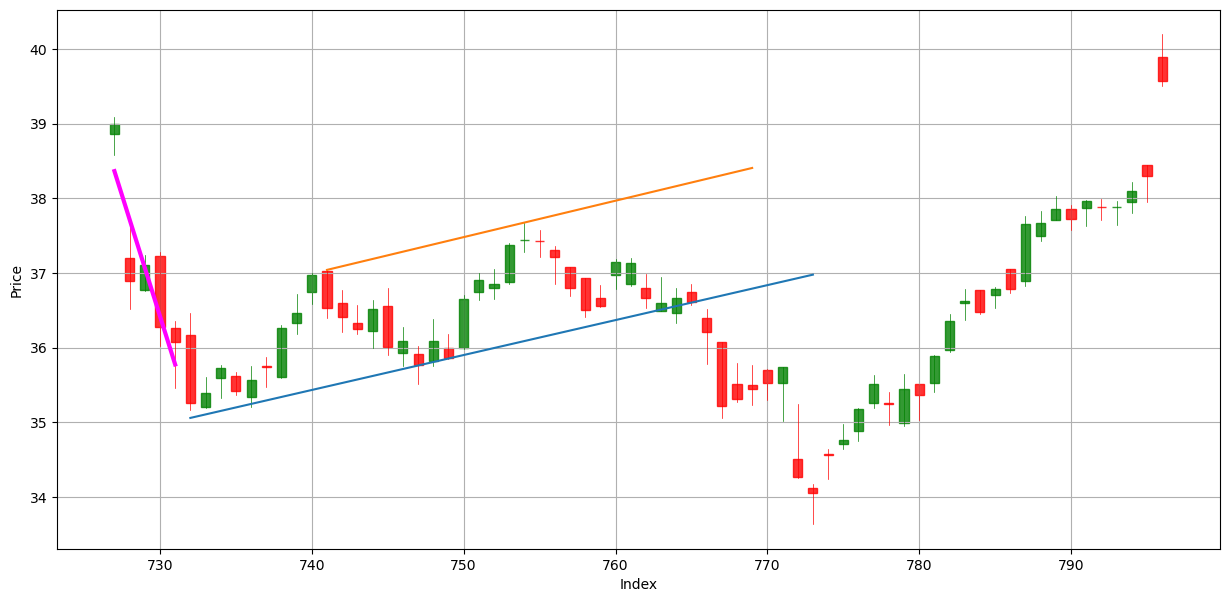

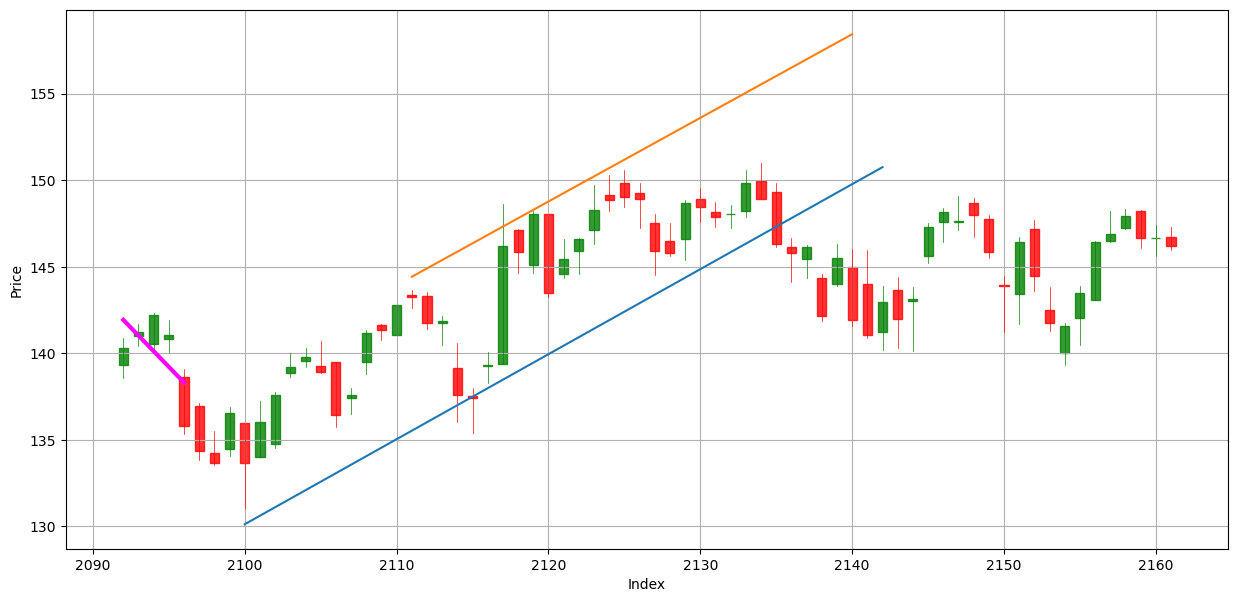

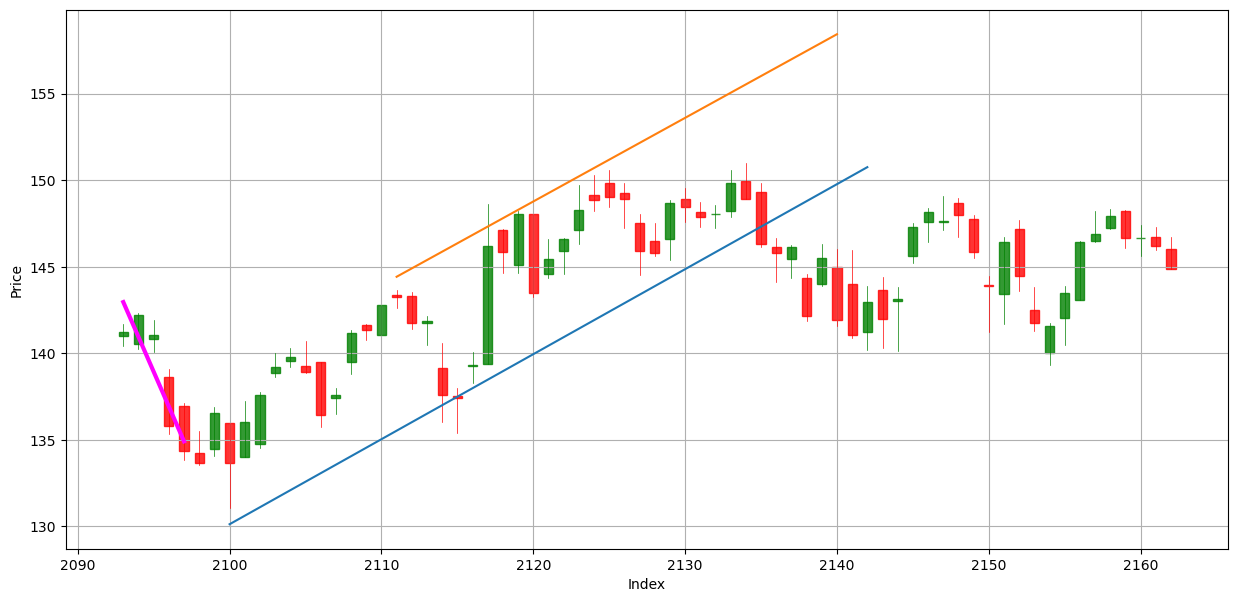

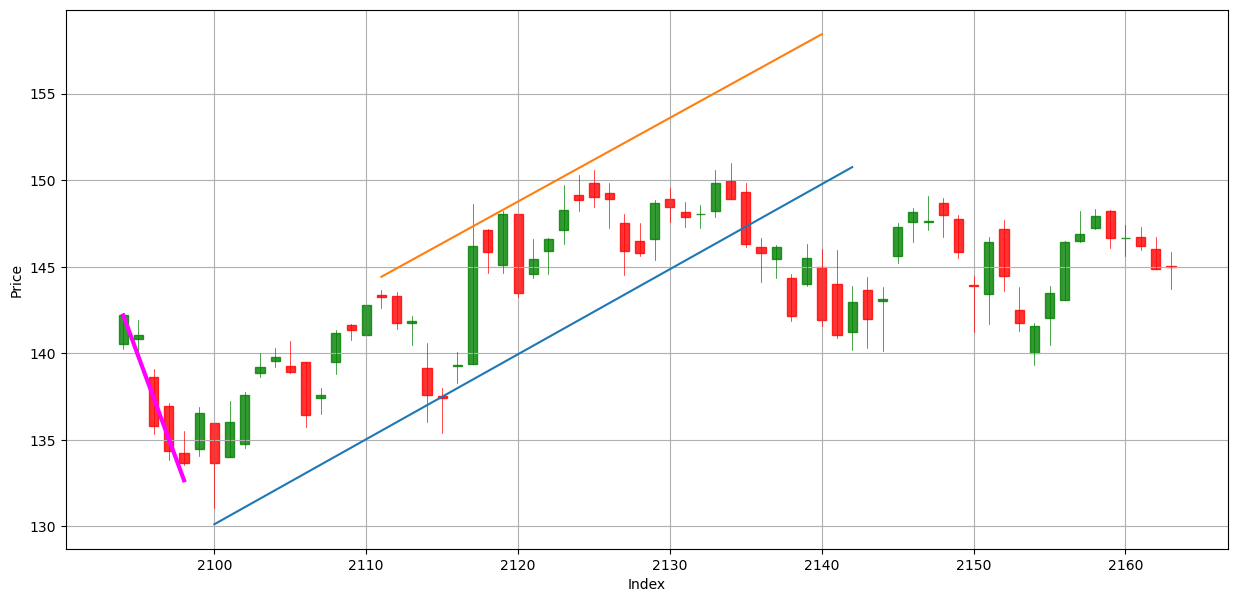

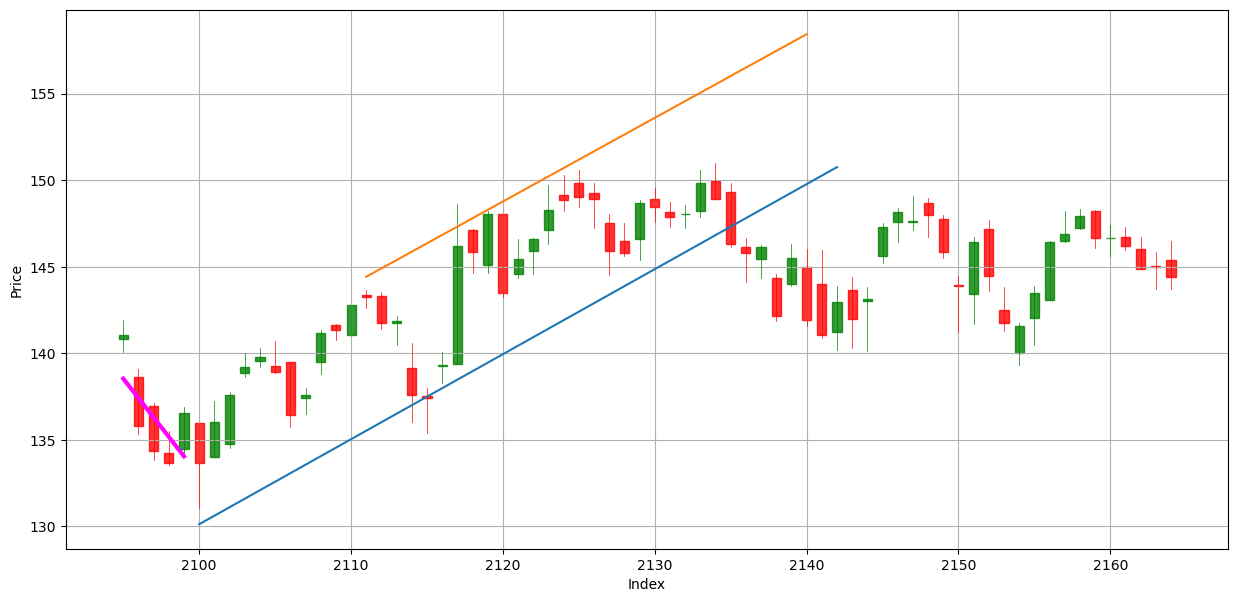

[*********************100%***********************]  1 of 1 completed


C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


[*********************100%***********************]  1 of 1 completed


C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


[*********************100%***********************]  1 of 1 completed


C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


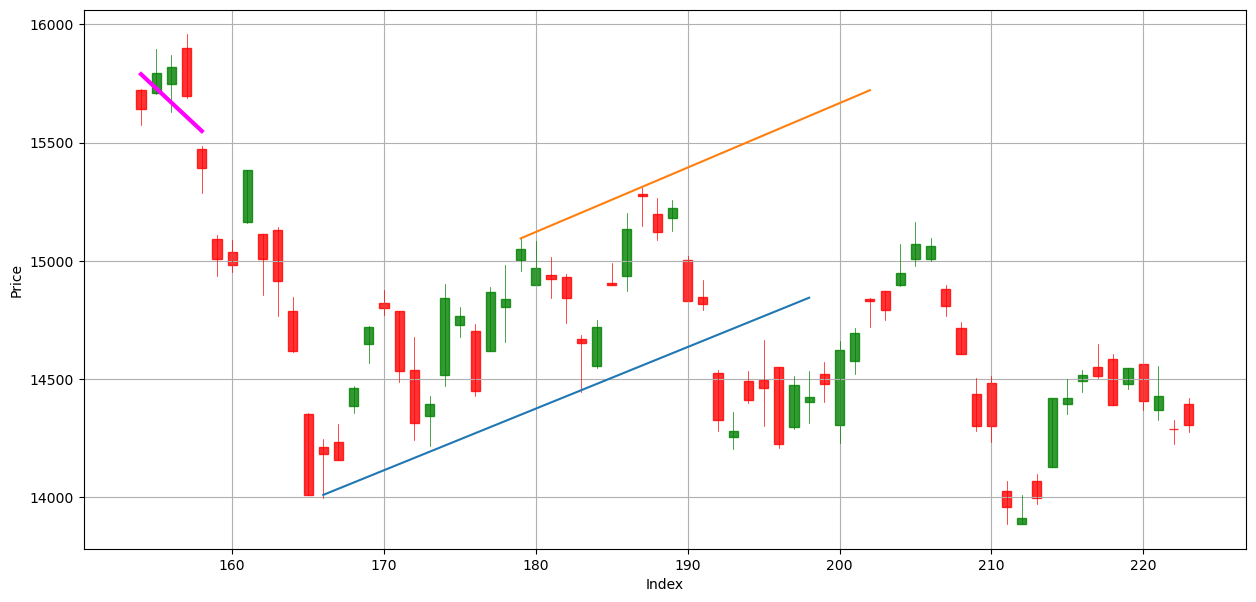

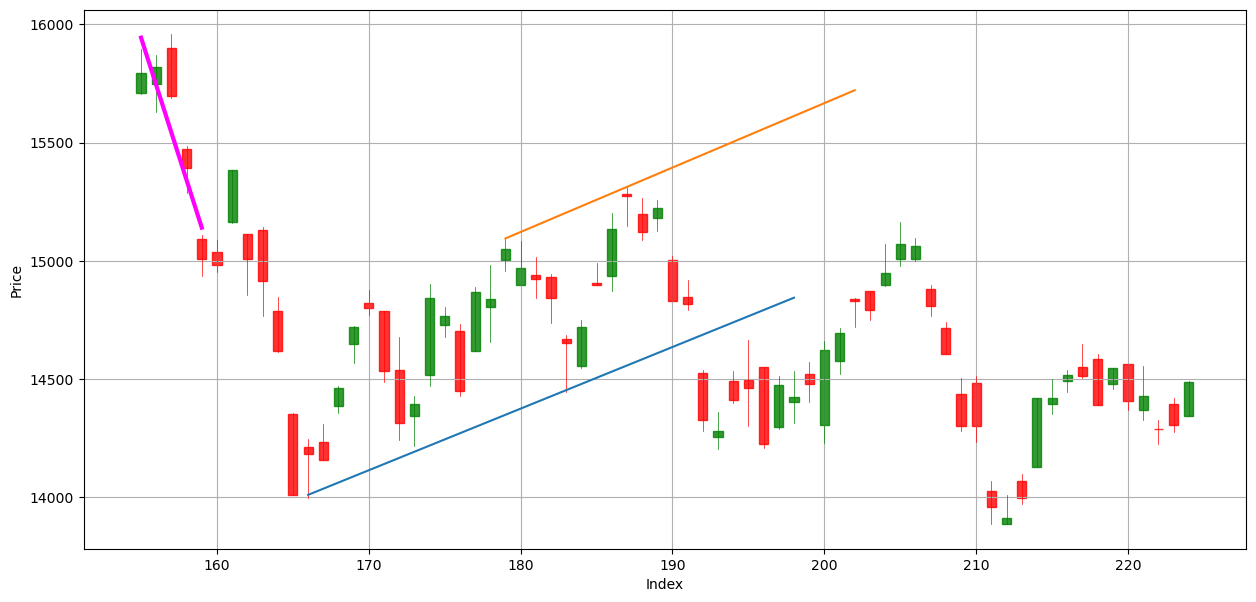

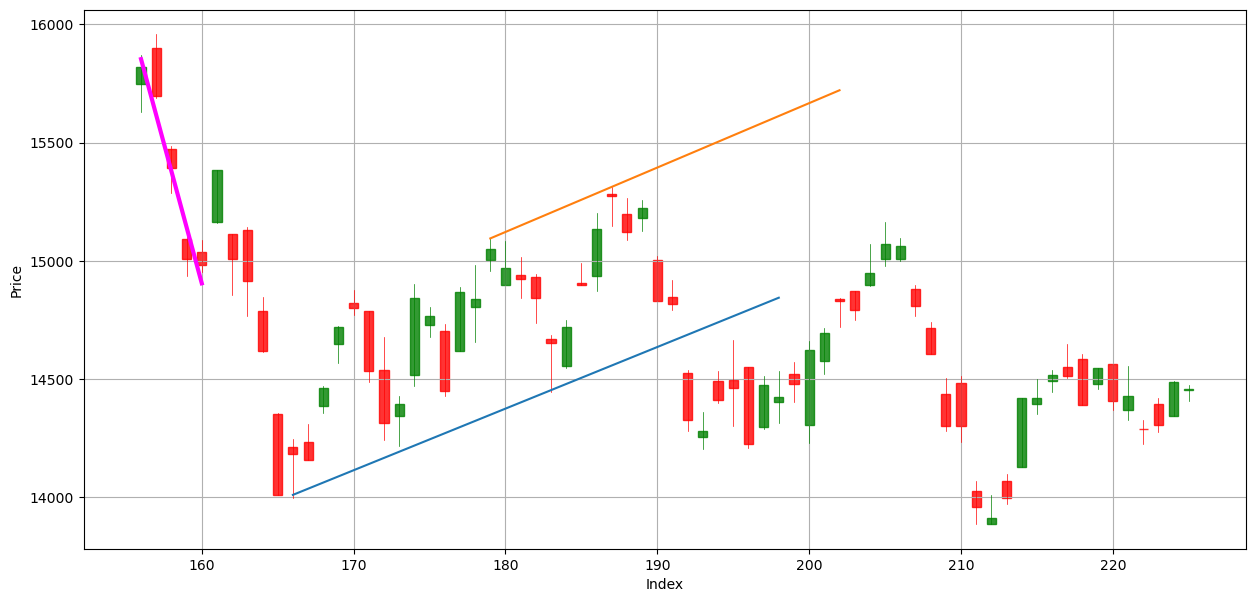

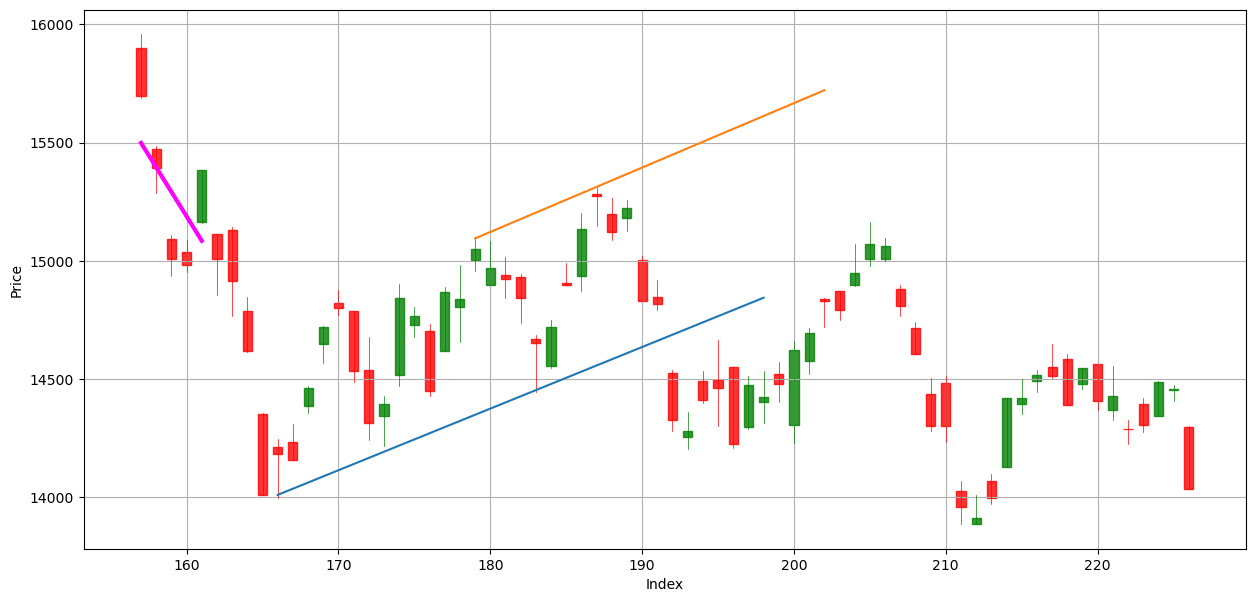

[*********************100%***********************]  1 of 1 completed


C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


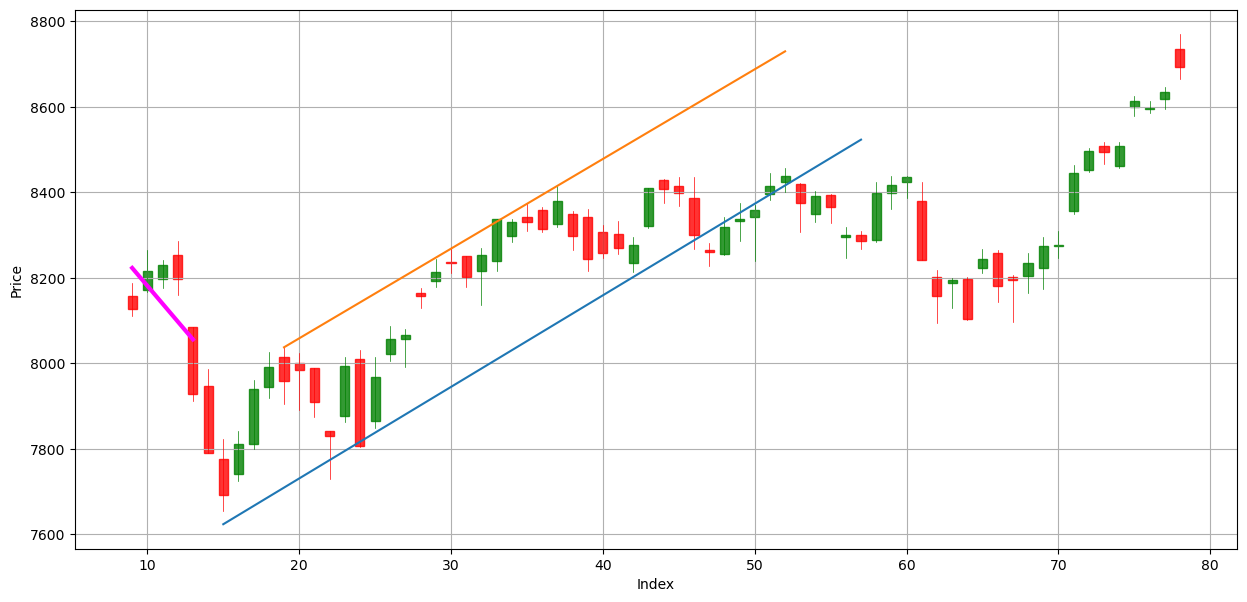

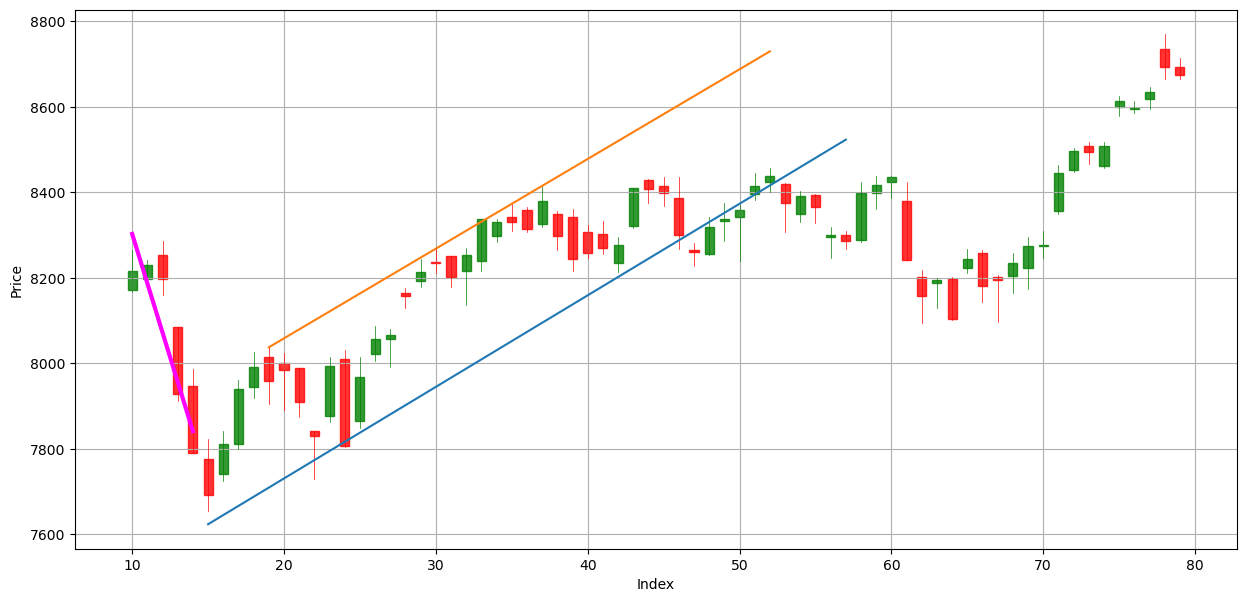

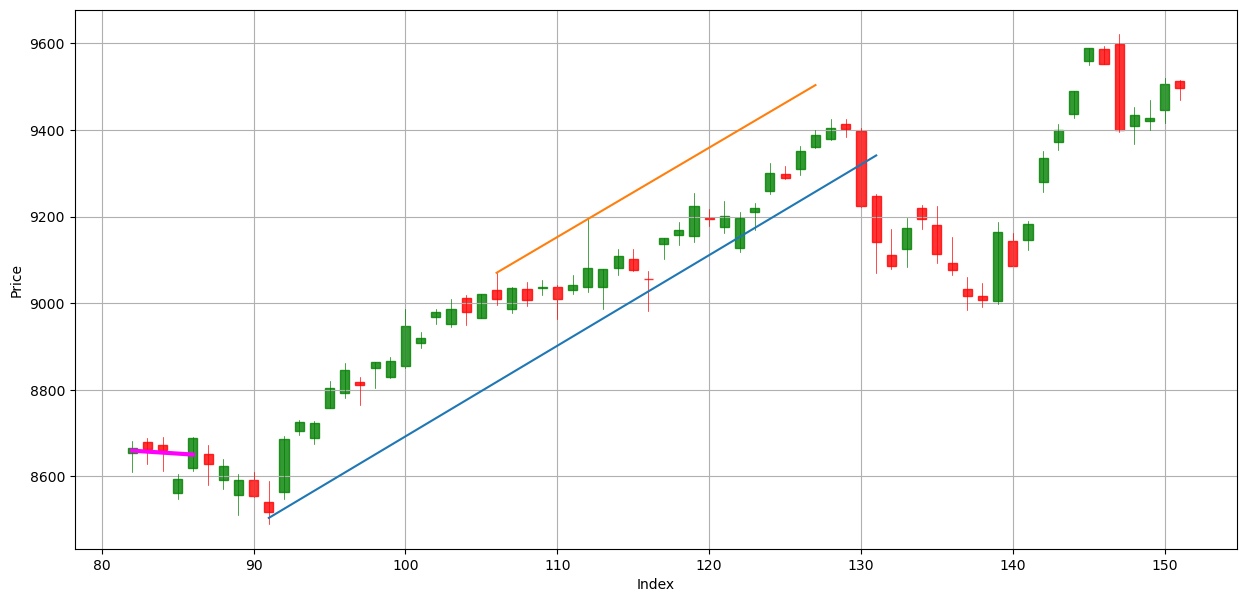

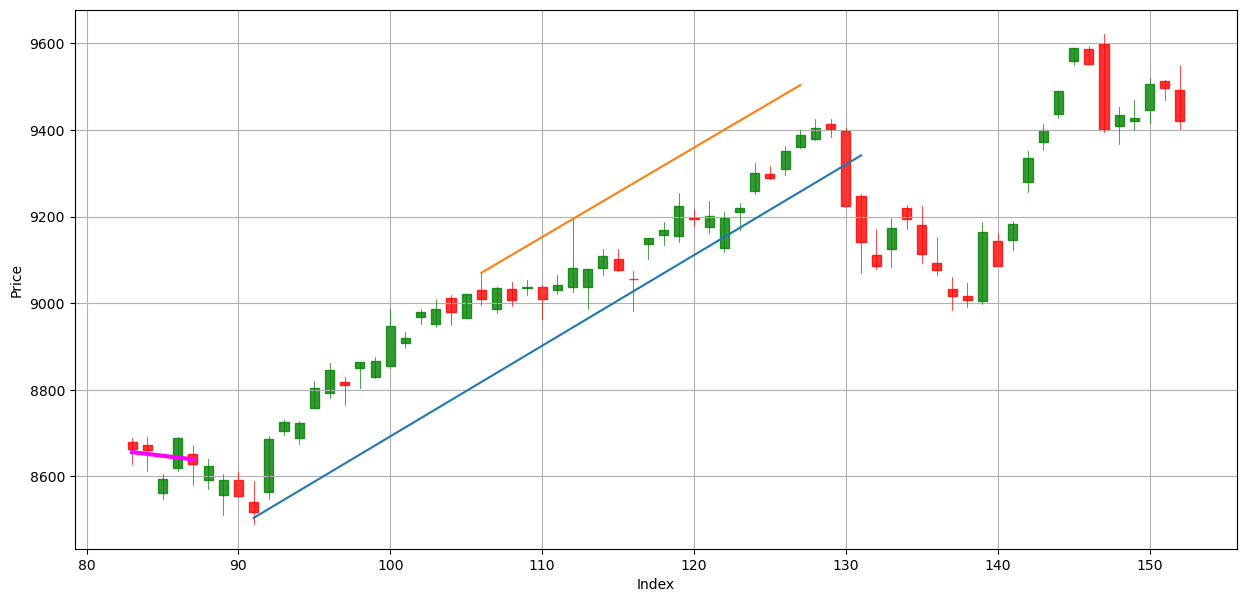

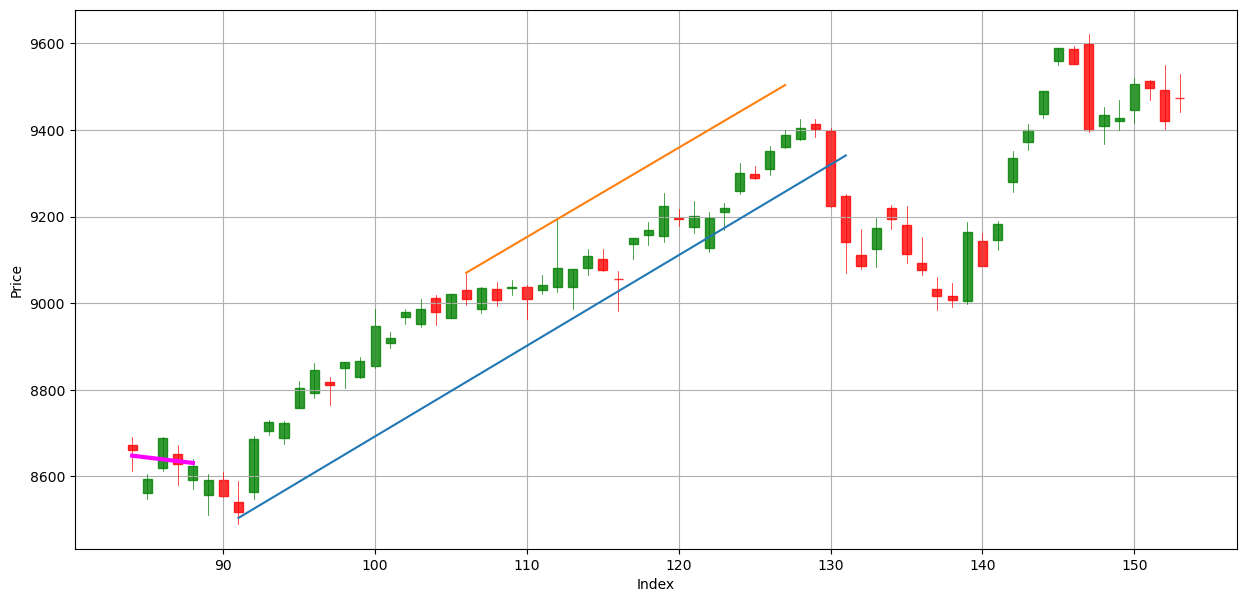

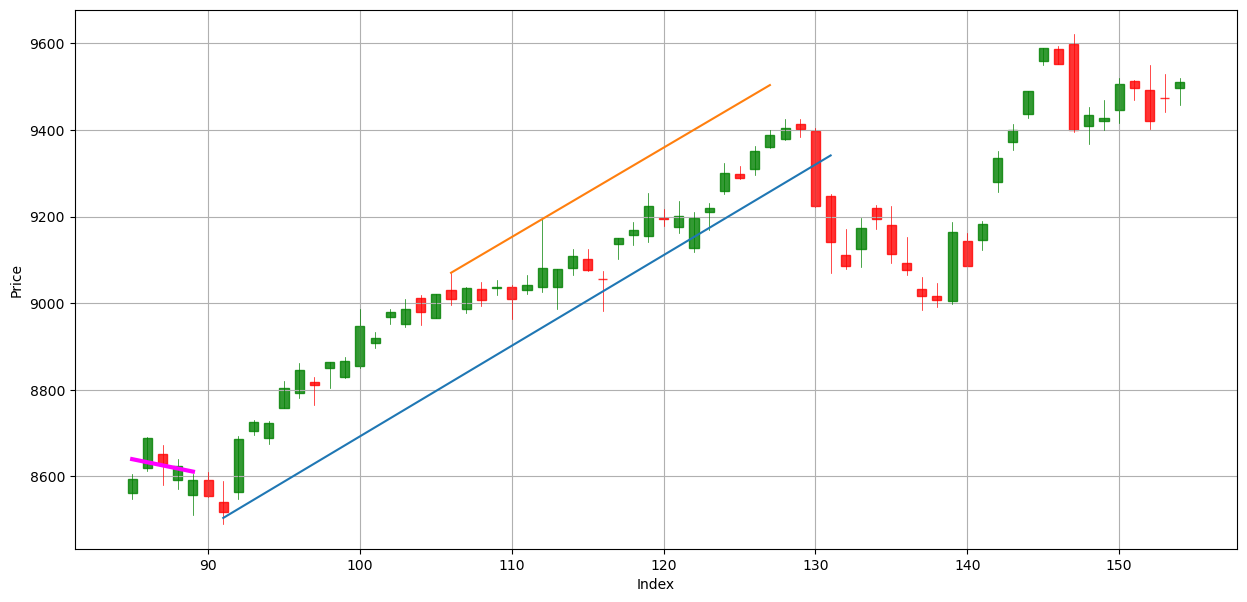

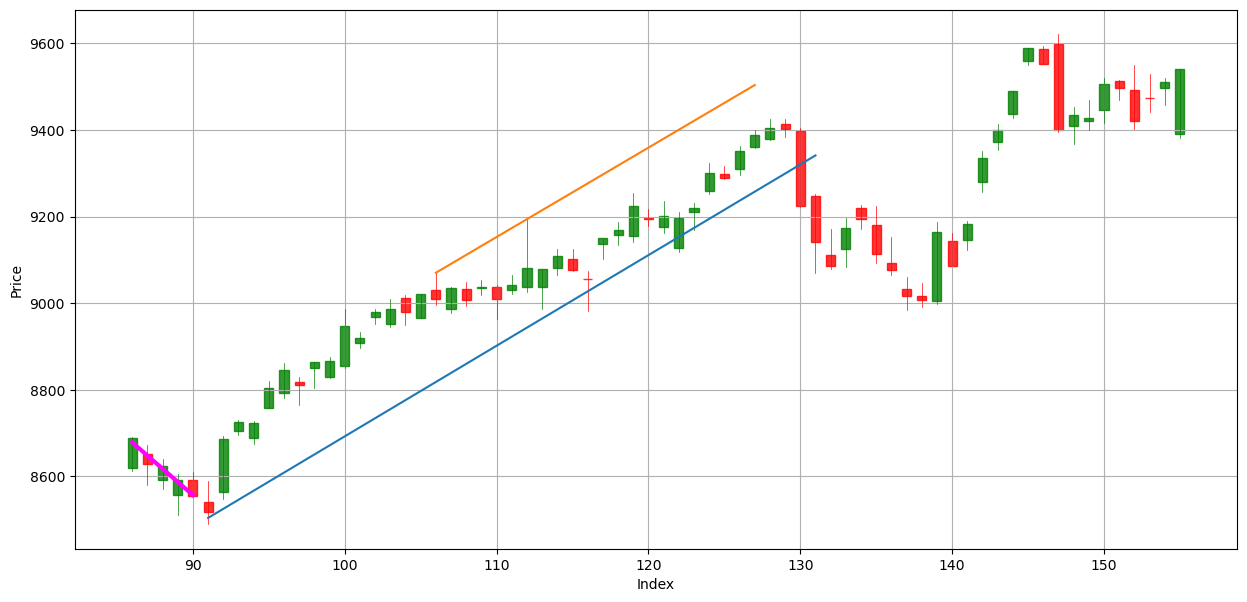

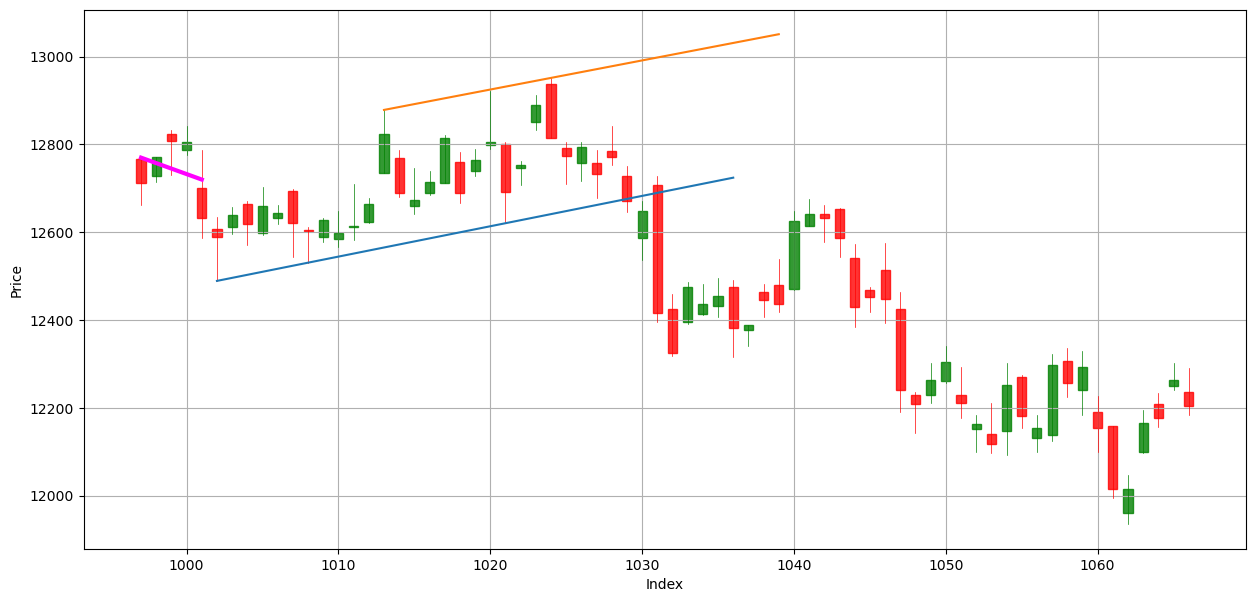

[*********************100%***********************]  1 of 1 completed


C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [10]:
for i in range(0,10):
    stock_data = yf.download(ticker[i],start="2013-06-01",end="2023-06-01")
    df   = stock_data.copy()

    df = df[df['Volume']!=0]
    df.reset_index(drop=True, inplace=True)

    req = df.loc[:, ["Open", "High", "Low", "Close"] ]
    req["Pivot"] = 0

    req["Pivot"]    = req.apply(lambda x: pivot_id(req, x.name, 5, 5), axis=1)
    req["PointPos"] = req.apply(lambda row: pivot_point_position(row), axis=1)
    
    lookback = 30
    flag_points = find_flag_points(req, lookback)

    plot_bear_flag(req, flag_points, lookback)

## Head & Shoulder

In [11]:
def _find_points(df, candle_id, back_candles):
    maxim = np.array([])
    minim = np.array([])
    xxmin = np.array([])
    xxmax = np.array([])
    minbcount=0 #minimas before head
    maxbcount=0 #maximas before head
    minacount=0 #minimas after head
    maxacount=0 #maximas after head
    
    for i in range(candle_id-back_candles, candle_id+back_candles):
        if df.loc[i,"ShortPivot"] == 1:
            minim = np.append(minim, df.loc[i, "Low"])
            xxmin = np.append(xxmin, i)        
            if i < candle_id:
                minbcount=+1
            elif i>candle_id:
                minacount+=1
        if df.loc[i, "ShortPivot"] == 2:
            maxim = np.append(maxim, df.loc[i, "High"])
            xxmax = np.append(xxmax, i)
            if i < candle_id:
                maxbcount+=1
            elif i>candle_id:
                maxacount+=1
    return maxim, minim, xxmax, xxmin, maxacount, minacount, maxbcount, minbcount

In [12]:
def find_head_and_shoulders(df, back_candles):
    all_points = []
    for candle_id in range(back_candles+20, len(df)-back_candles):
        
        if df.loc[candle_id, "Pivot"] != 2 or df.loc[candle_id,"ShortPivot"] != 2:
            continue
          
        maxim, minim, xxmax, xxmin, maxacount, minacount, maxbcount, minbcount = _find_points(df, candle_id, back_candles)
        if minbcount<1 or minacount<1 or maxbcount<1 or maxacount<1:
            continue

        slmin, intercmin, rmin, pmin, semin = linregress(xxmin, minim)
        headidx = np.argmax(maxim, axis=0)
 
        if maxim[headidx]-maxim[headidx-1]>1.5e-3 and maxim[headidx]-maxim[headidx+1]>1.5e-3 and abs(slmin)<=0.05: 
            all_points.append(candle_id)        

    return all_points

In [13]:
def plot_head_and_shoulder(ohlc, all_points, back_candles):
    
    total = len(all_points)
    for j, point in enumerate(all_points):

        maxim = np.array([])
        minim = np.array([])
        xxmin = np.array([])
        xxmax = np.array([])
        ohlc["HS"] = np.nan

        for i in range(point-back_candles, point+back_candles):
            if ohlc.loc[i,"ShortPivot"] == 1:
                minim = np.append(minim, ohlc.loc[i, "Low"])
                xxmin = np.append(xxmin, i)        

            if ohlc.loc[i, "ShortPivot"] == 2:
                maxim = np.append(maxim, ohlc.loc[i, "High"])
                xxmax = np.append(xxmax, i)              

        
        headidx = np.argmax(maxim, axis=0)  
        
        hsx = ohlc.loc[[xxmax[headidx-1],xxmin[0],xxmax[headidx],xxmin[1],xxmax[headidx+1] ],"Date"]
        hsy = [maxim[headidx-1], minim[0], maxim[headidx], minim[1], maxim[headidx+1]]
        
        ohlc_copy = ohlc.copy()
        ohlc_copy.set_index("Date", inplace=True)
        
        levels = [(x,y) for x,y in zip(hsx,hsy)]

        for l in levels:
            ohlc_copy.loc[l[0].strftime("%Y-%m-%dT%H:%M:%S.%f"),"HS"] = l[1]

        ohlc_hs  = ohlc_copy.iloc[point-(back_candles+6):point+back_candles+6, : ]
        hs_l       = mpf.make_addplot(ohlc_hs["HS"], type="scatter", color='r', marker="v", markersize=200)
        mpf.plot(ohlc_hs,
                type='candle',
                style='charles',
                addplot=[hs_l],
                alines=dict(alines=levels,colors=['purple'], alpha=0.5,linewidths=3)
                )
    return

[*********************100%***********************]  1 of 1 completed


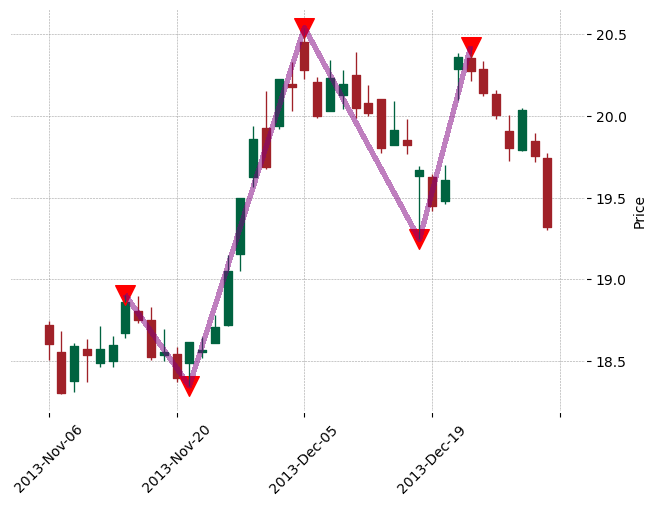

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


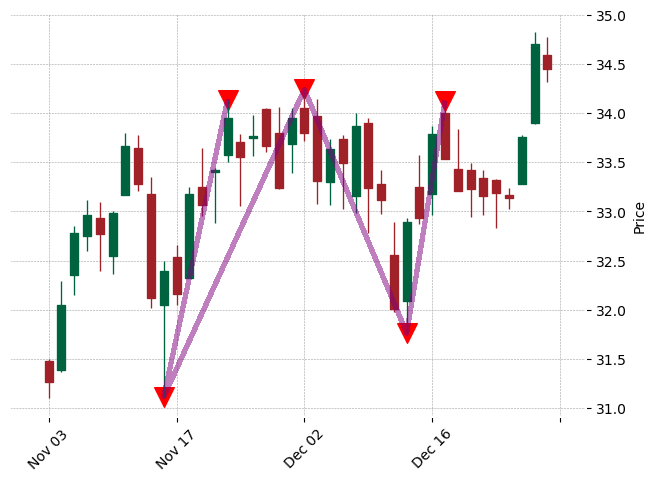

[*********************100%***********************]  1 of 1 completed


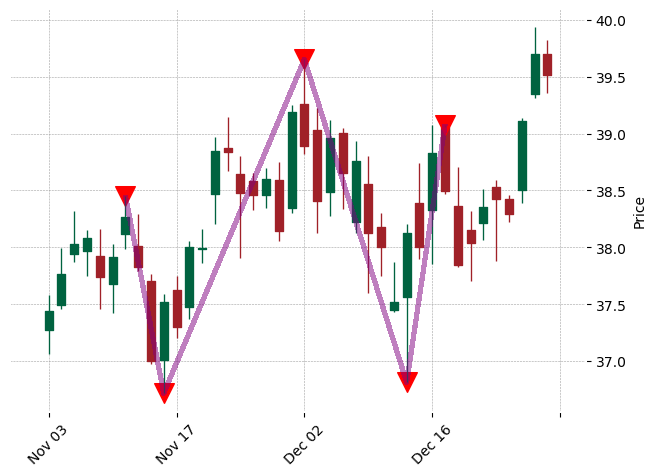

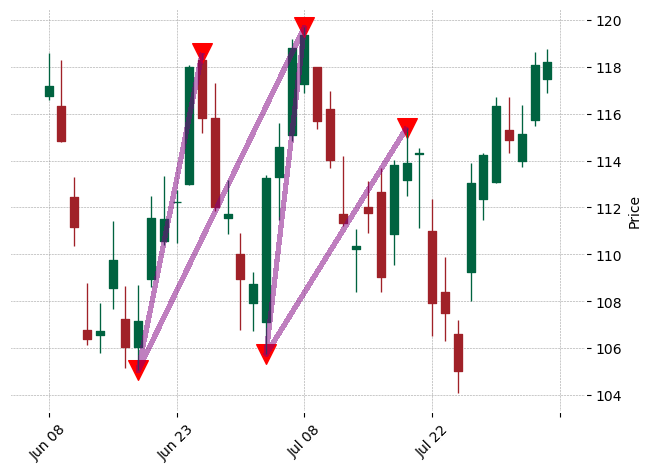

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


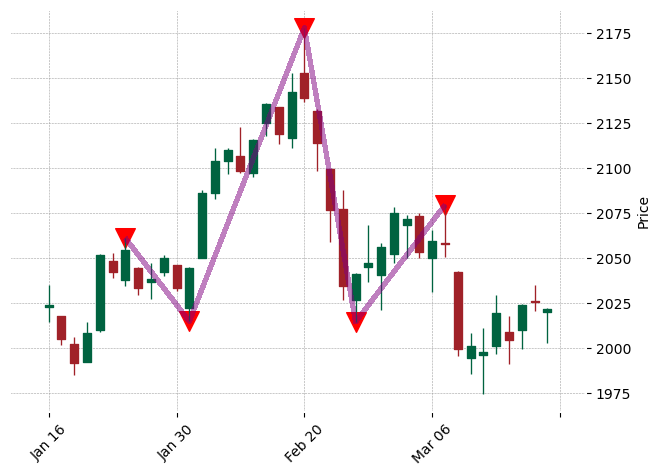

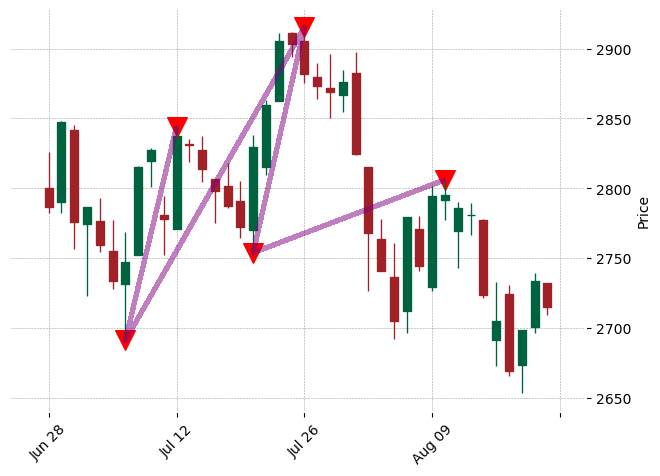

In [14]:
for i in range(0,10):
    stock_data = yf.download(ticker[i],start="2013-06-01",end="2023-06-01")
    stock_data = stock_data.reset_index()
    stock_data.rename(columns={"index": "Date"}, inplace=True)
    df   = stock_data.copy()
    df = df[df['Volume']!=0]
    df.reset_index(drop=True, inplace=True)
    
    req = df.loc[:, ["Date", "Open", "High", "Low", "Close"] ]
    req["Date"] = pd.DatetimeIndex(req["Date"]) 

   
    req["Pivot"] = req.apply(lambda x: pivot_id(req, x.name, 15, 15), axis=1)
    req['ShortPivot'] = req.apply(lambda x: pivot_id(req, x.name,5,5), axis=1)
    req['PointPos'] = req.apply(lambda row: pivot_point_position(row), axis=1)
 
    back_candles =14
    all_points = find_head_and_shoulders(req,back_candles)
    
    plot_head_and_shoulder(req, all_points, back_candles)

## Rounding Top

In [15]:
def find_rounding_top_points(ohlc, back_candles):
    all_points = []
    for candle_idx in range(back_candles + 10, len(ohlc)):
        maxim = np.array([])
        minim = np.array([])
        xxmin = np.array([])
        xxmax = np.array([])

        for i in range(candle_idx - back_candles, candle_idx + 1):
            if ohlc.loc[i, "Pivot"] == 2:
                minim = np.append(minim, ohlc.loc[i, "Close"])
                xxmin = np.append(xxmin, i)
            if ohlc.loc[i, "Pivot"] == 1:
                maxim = np.append(maxim, ohlc.loc[i, "Close"])
                xxmax = np.append(xxmax, i)

        if (xxmax.size < 9 and xxmin.size < 9) or xxmax.size == 0 or xxmin.size == 0:
            continue
        z = np.polyfit(xxmax, maxim, 2)
        
        if 2 * xxmax[0] * z[0] + z[1] * xxmax[0] > 0 and 2 * z[0] < 0:
            if z[0] <= -5e-02 and z[1] >= 5e-02:
                all_points.append(candle_idx)

    return all_points

In [16]:
def plot_rounding_top(ohlc, all_points, back_candles):
    
    total = len(all_points)
    for j, point in enumerate(all_points):
        candleid = point

        maxim = np.array([])
        minim = np.array([])
        xxmin = np.array([])
        xxmax = np.array([])

        for i in range(point - back_candles, point + 1):
            if ohlc.loc[i, "Pivot"] == 2:
                minim = np.append(minim, ohlc.loc[i, "Close"])
                xxmin = np.append(xxmin, i)
            if ohlc.loc[i, "Pivot"] == 1:
                maxim = np.append(maxim, ohlc.loc[i, "Close"])
                xxmax = np.append(xxmax, i)
                
        if (xxmax.size < 9 and xxmin.size < 9) or xxmax.size == 0 or xxmin.size == 0:
            continue
        
        z = np.polyfit(xxmax, maxim, 2)
        f = np.poly1d(z)

        ohlc_subset = ohlc[point - back_candles - 10 : point + back_candles + 10]

        xxmax = np.insert(xxmax, 0, xxmax[0] - 3)
        xxmax = np.append(xxmax, xxmax[-1] + 3)
        maxim_new = f(xxmax)

        ohlc_subset_copy = ohlc_subset.copy()
        ohlc_subset_copy["Index"] = ohlc_subset_copy.index

        fig, ax = plt.subplots(figsize=(15, 7))

        candlestick_ohlc(
            ax,
            ohlc_subset_copy.loc[:, ["Index", "Open", "High", "Low", "Close"]].values,
            width=0.6,
            colorup="green",
            colordown="red",
            alpha=0.8,
        )
        ax.plot(xxmax, maxim_new)

        ax.grid(True)
        ax.set_xlabel("Index")
        ax.set_ylabel("Price")

        plt.show()

    return

[*********************100%***********************]  1 of 1 completed


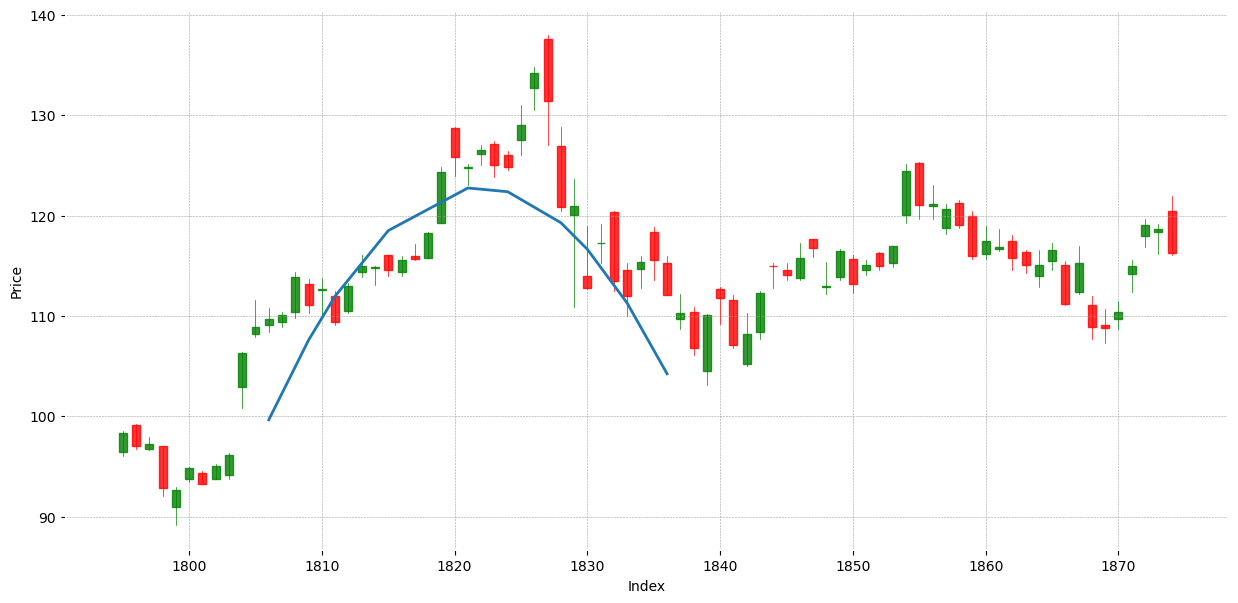

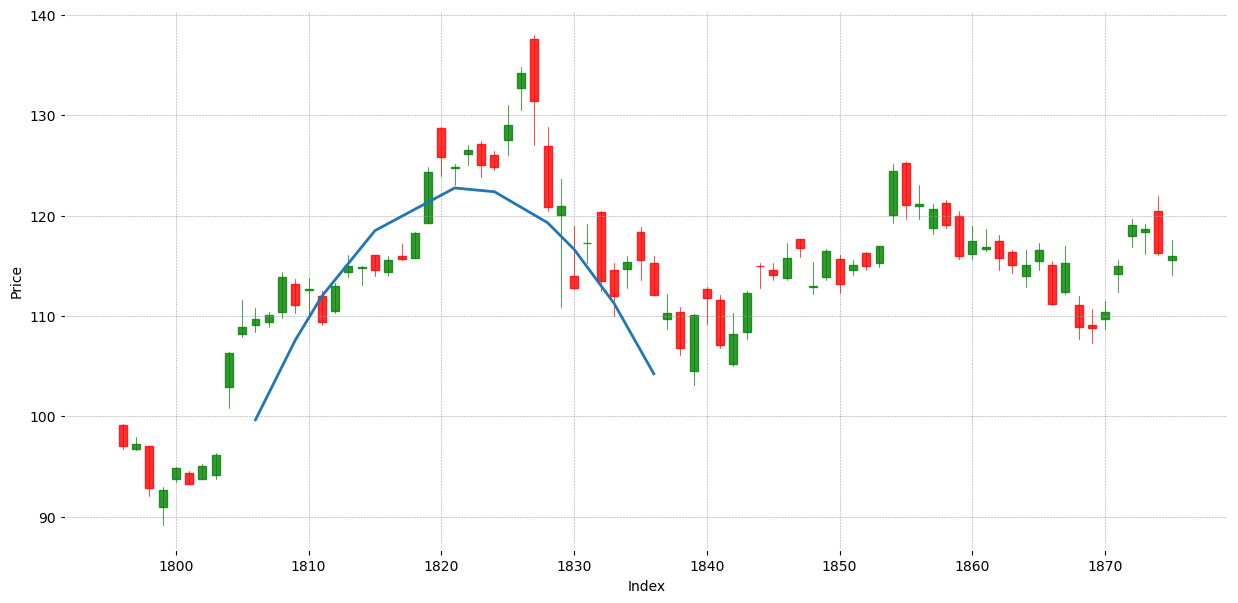

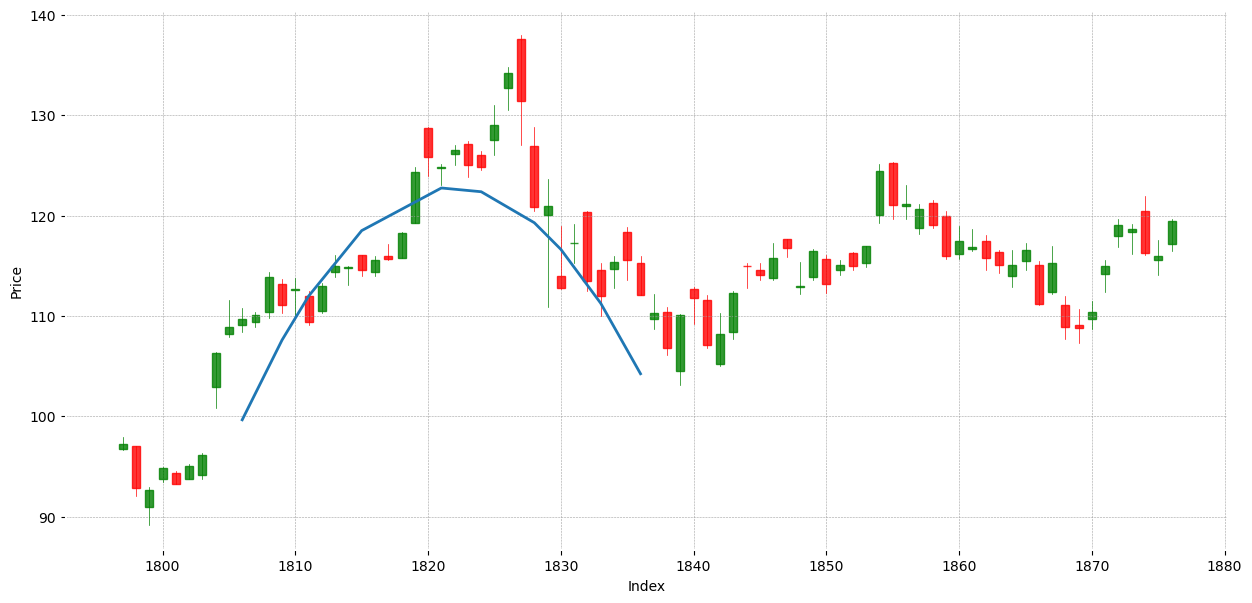

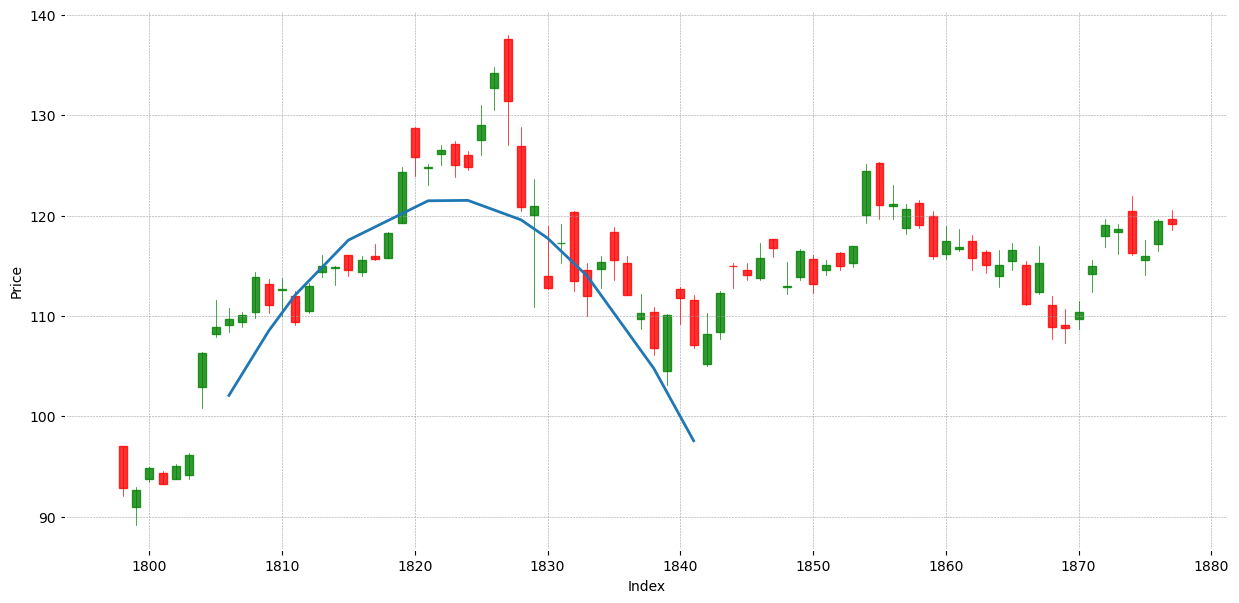

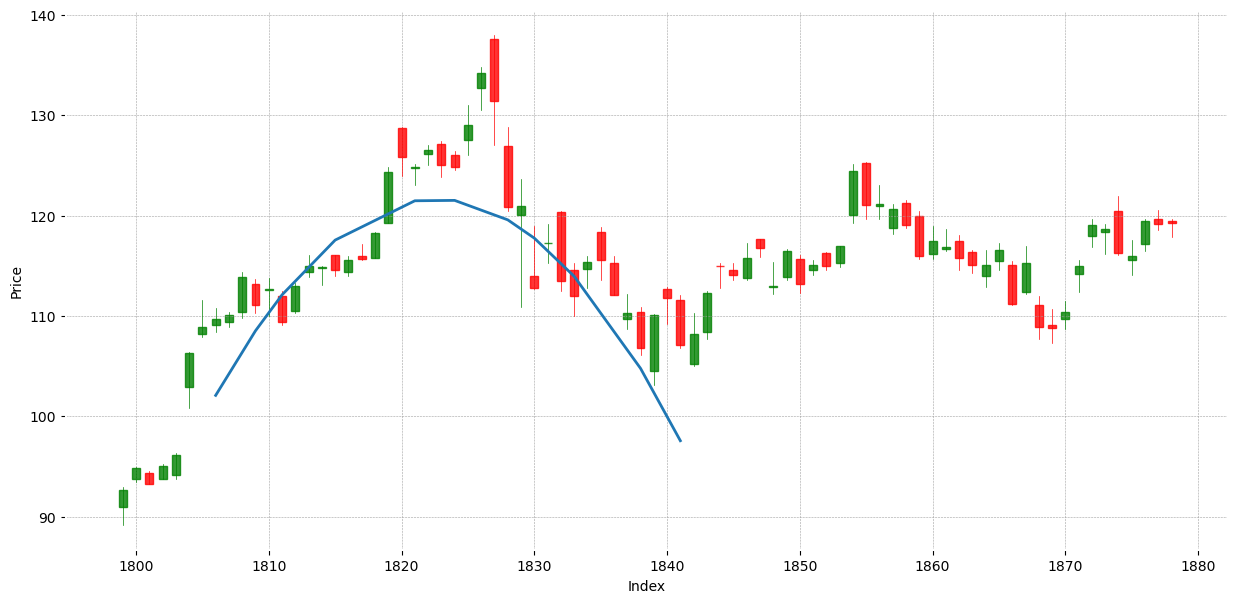

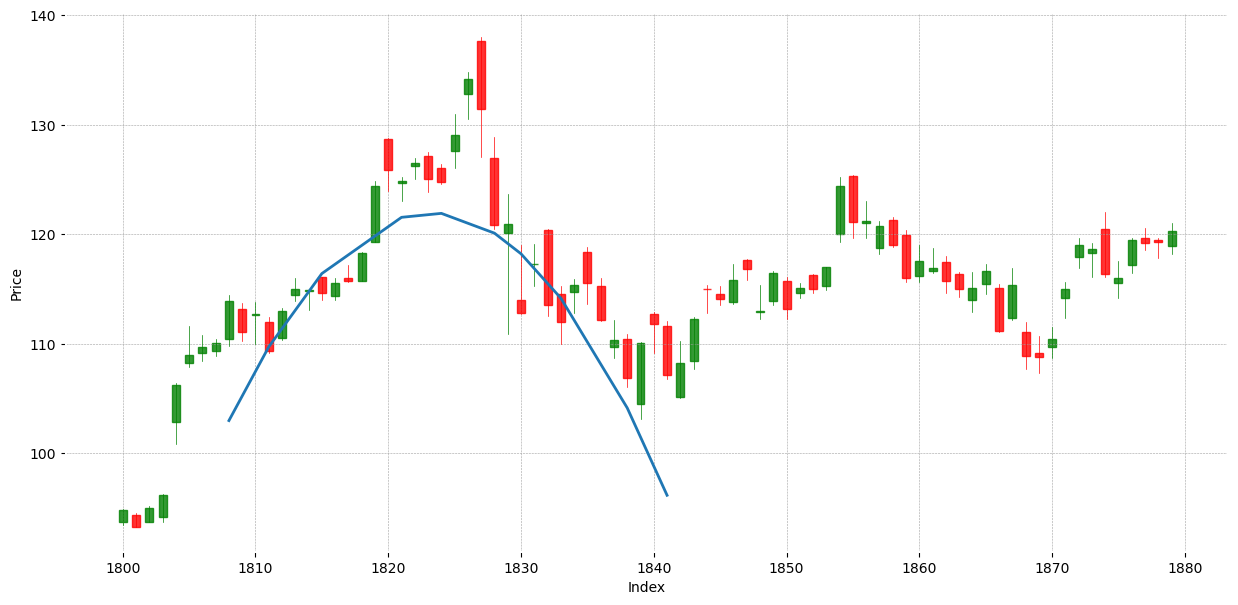

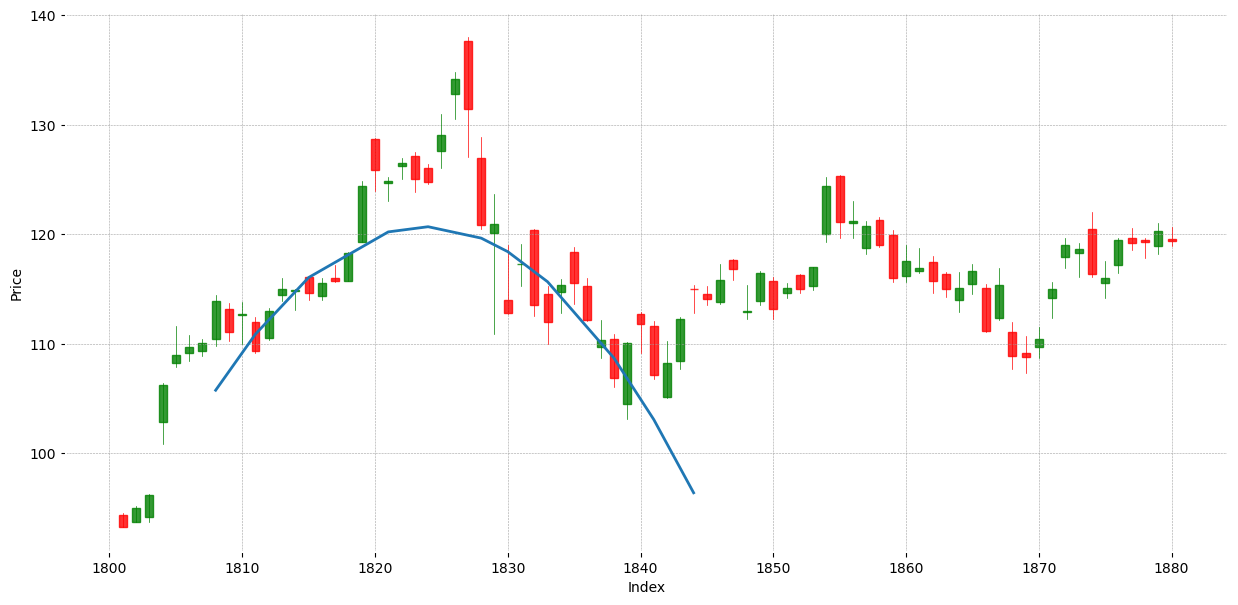

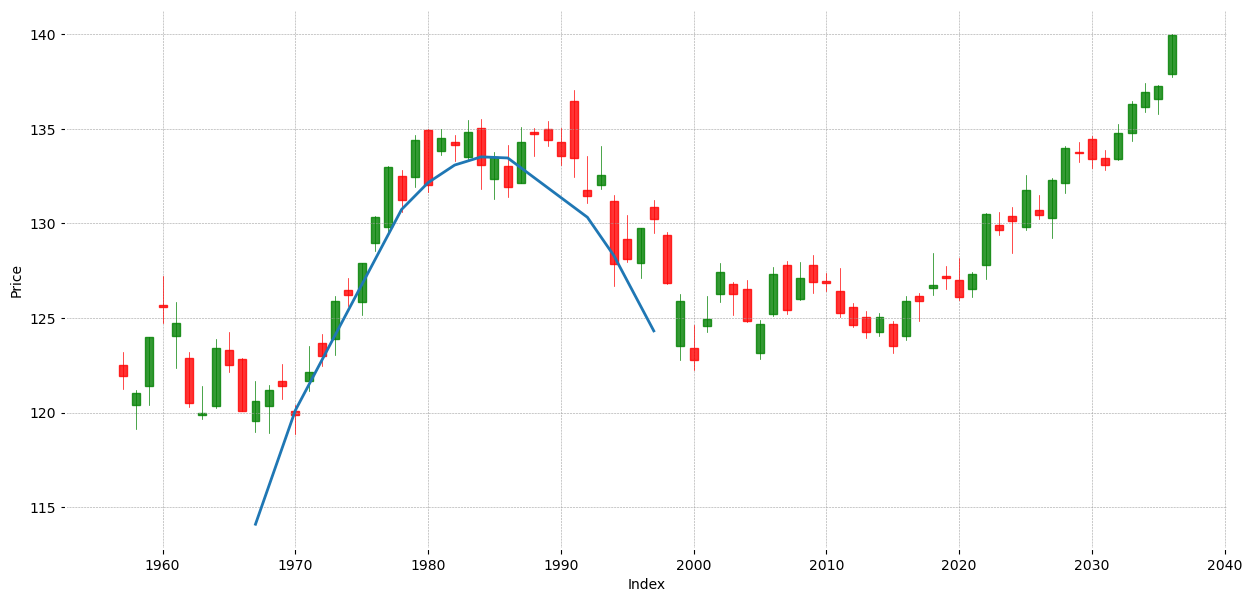

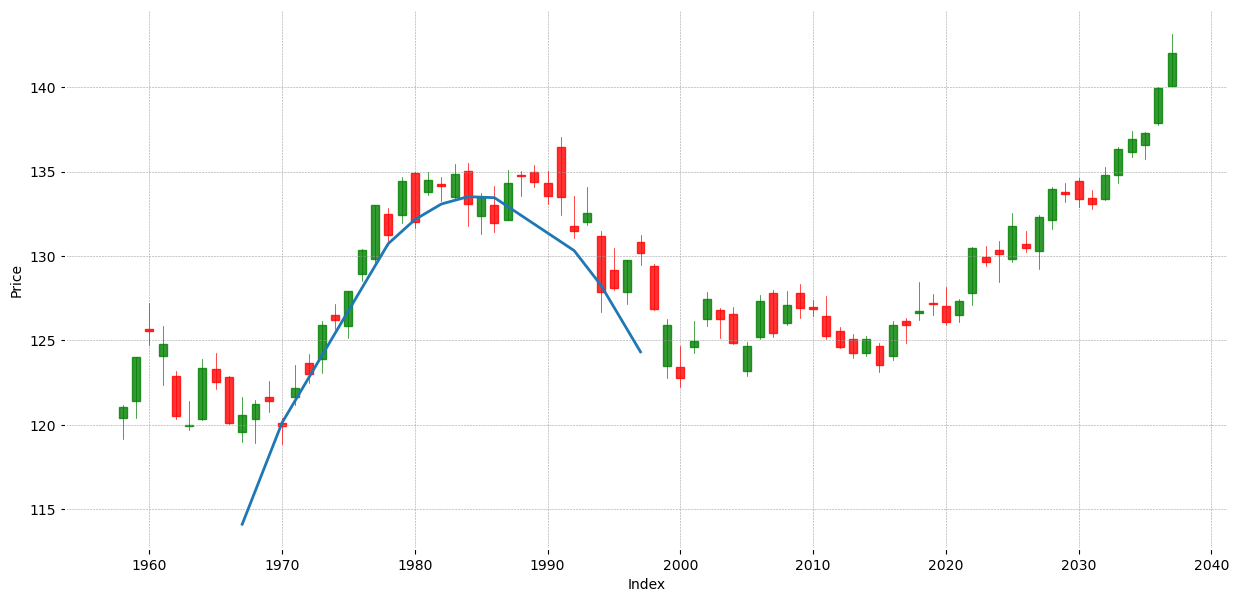

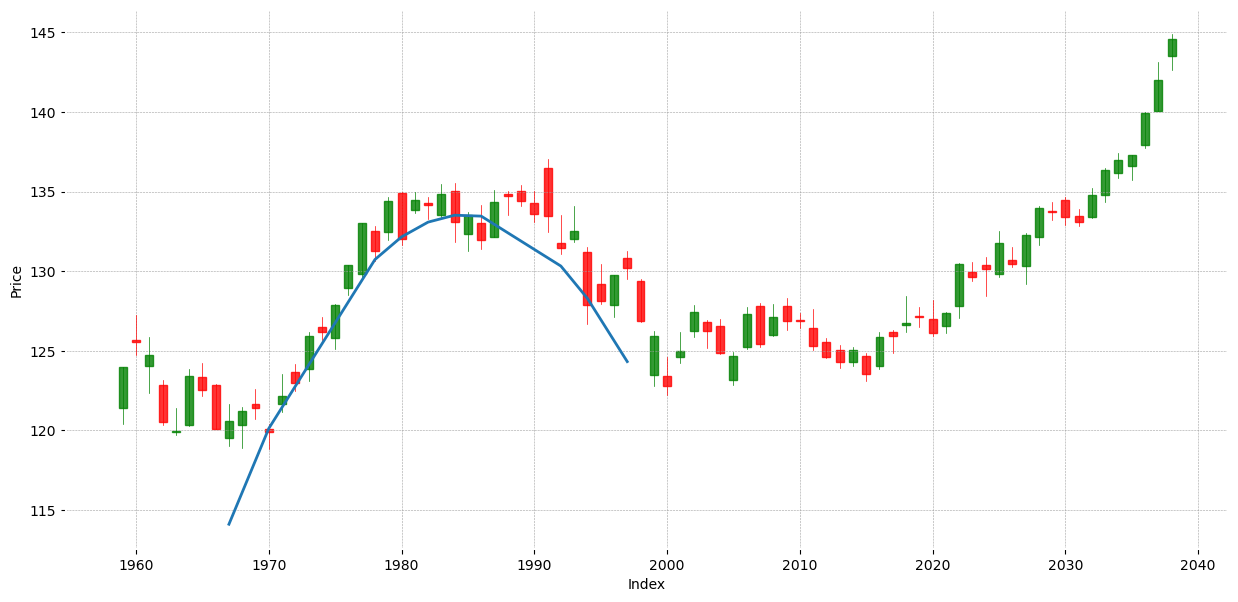

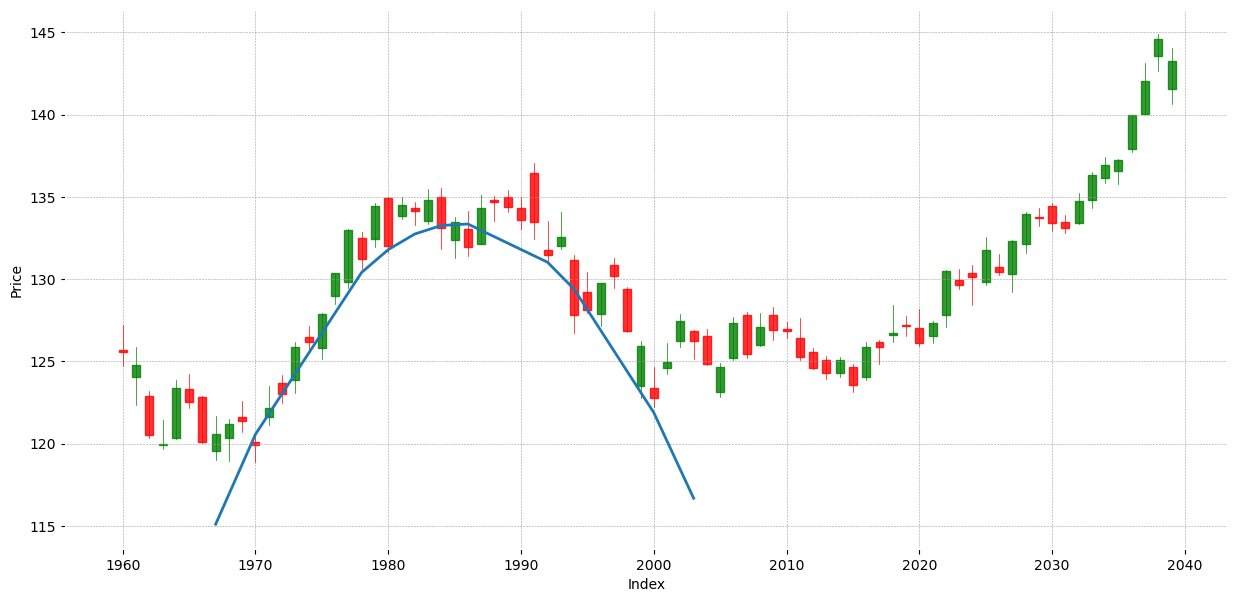

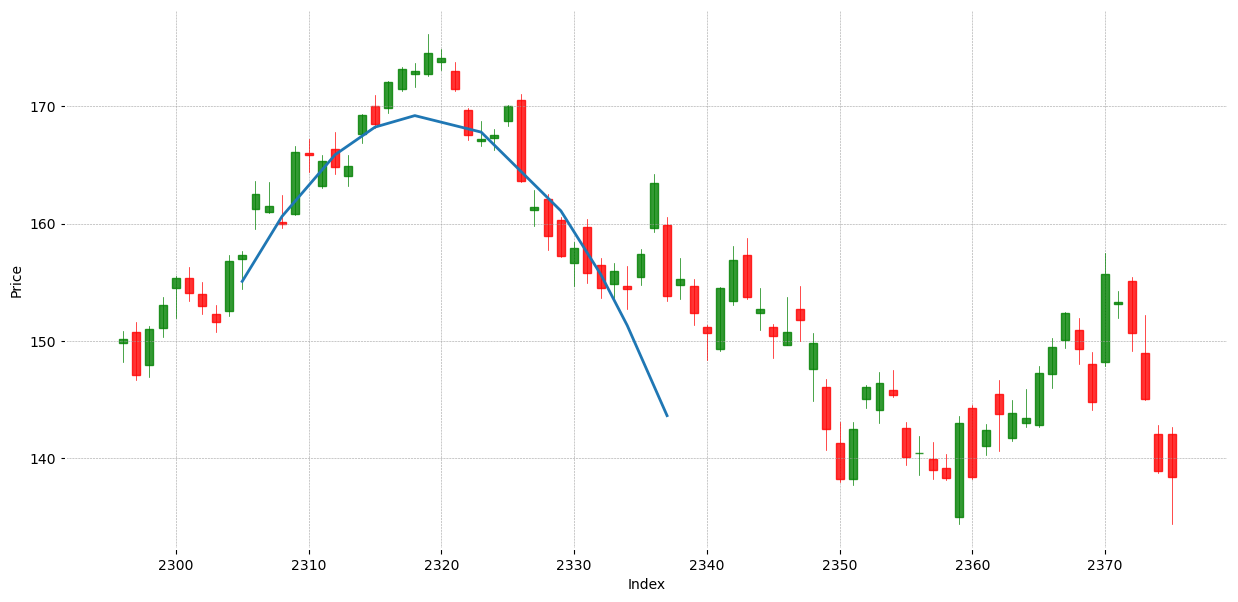

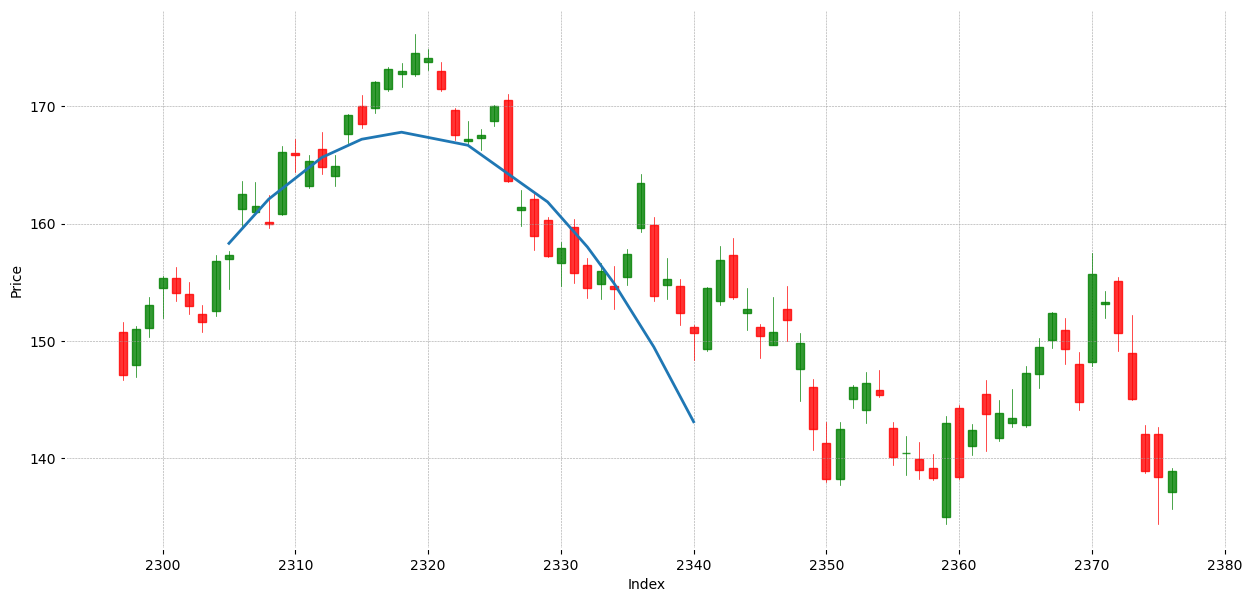

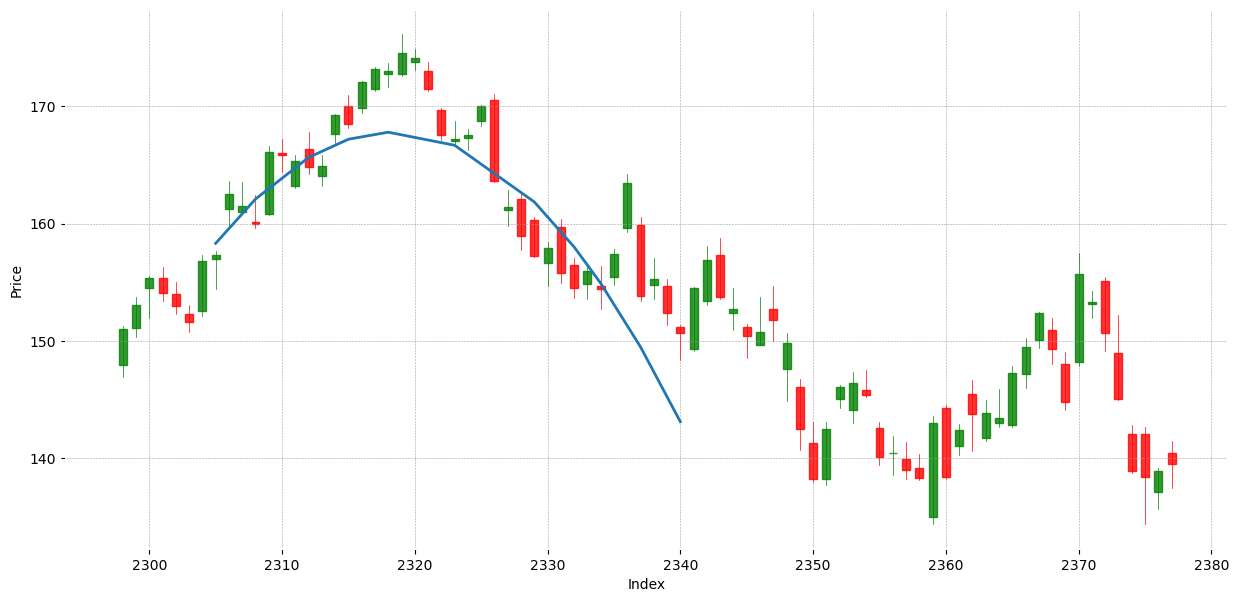

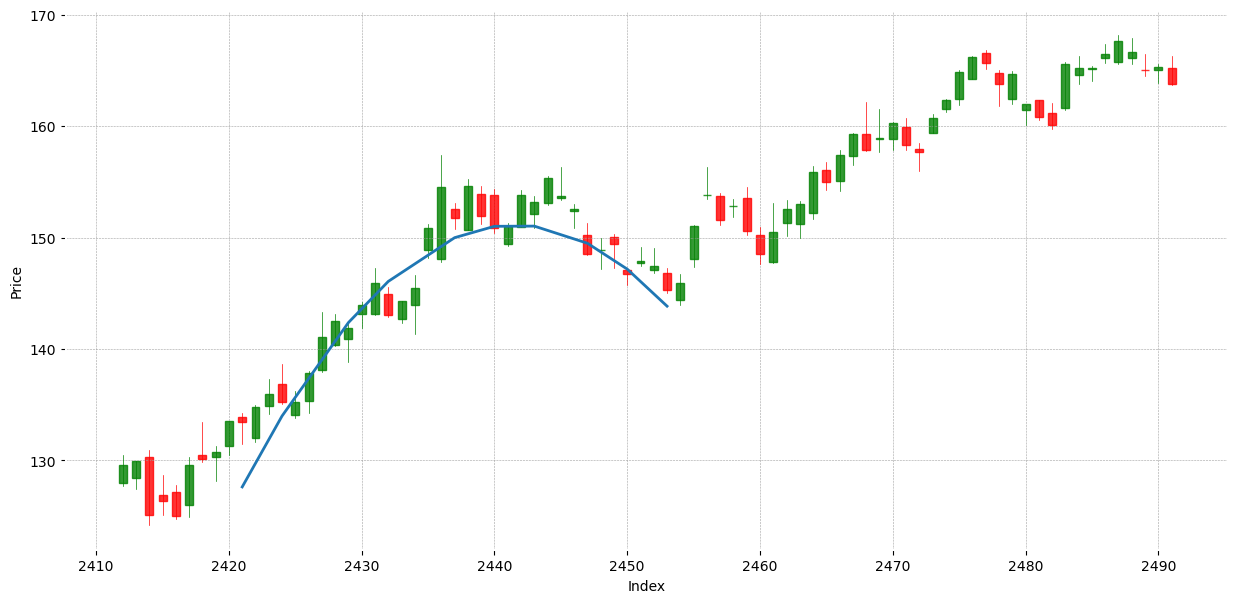

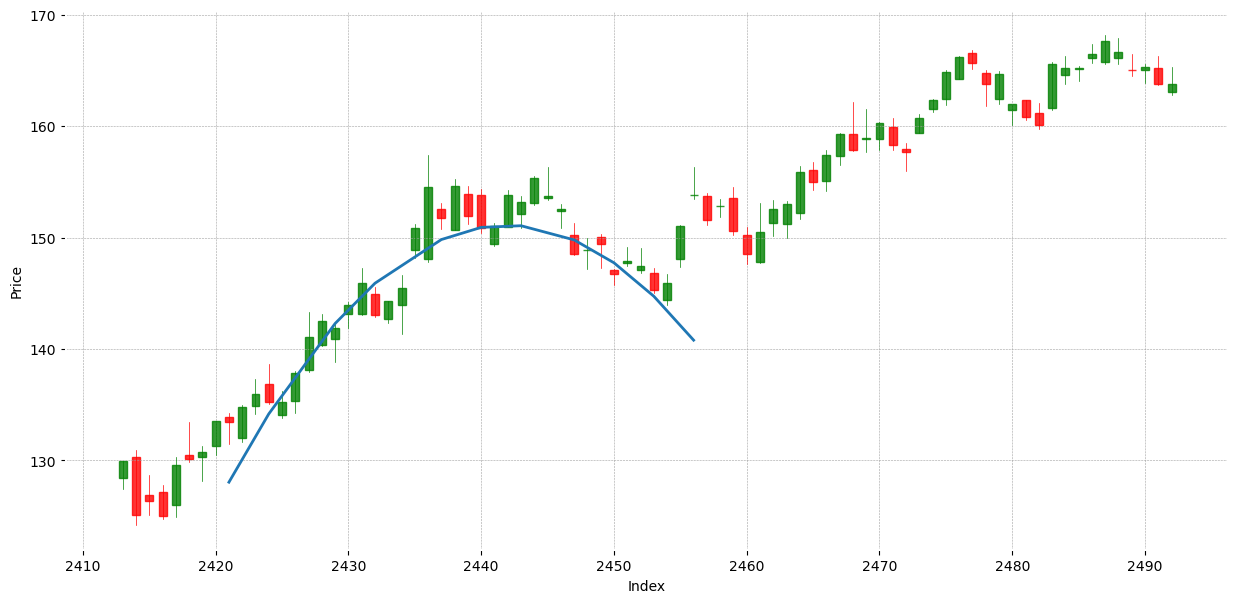

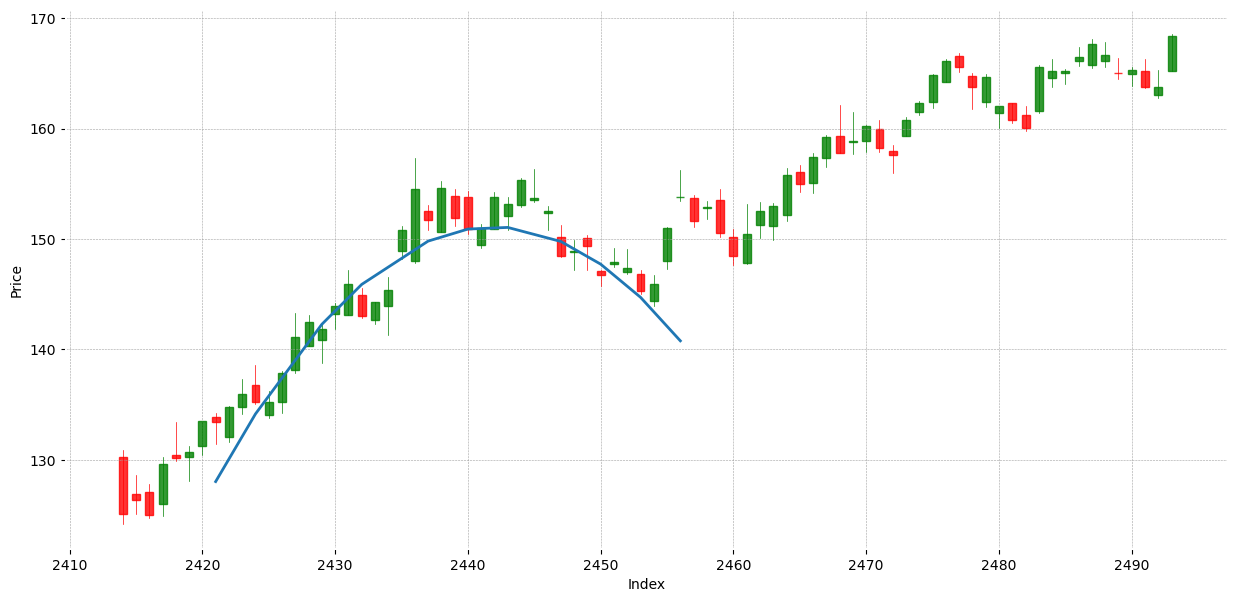

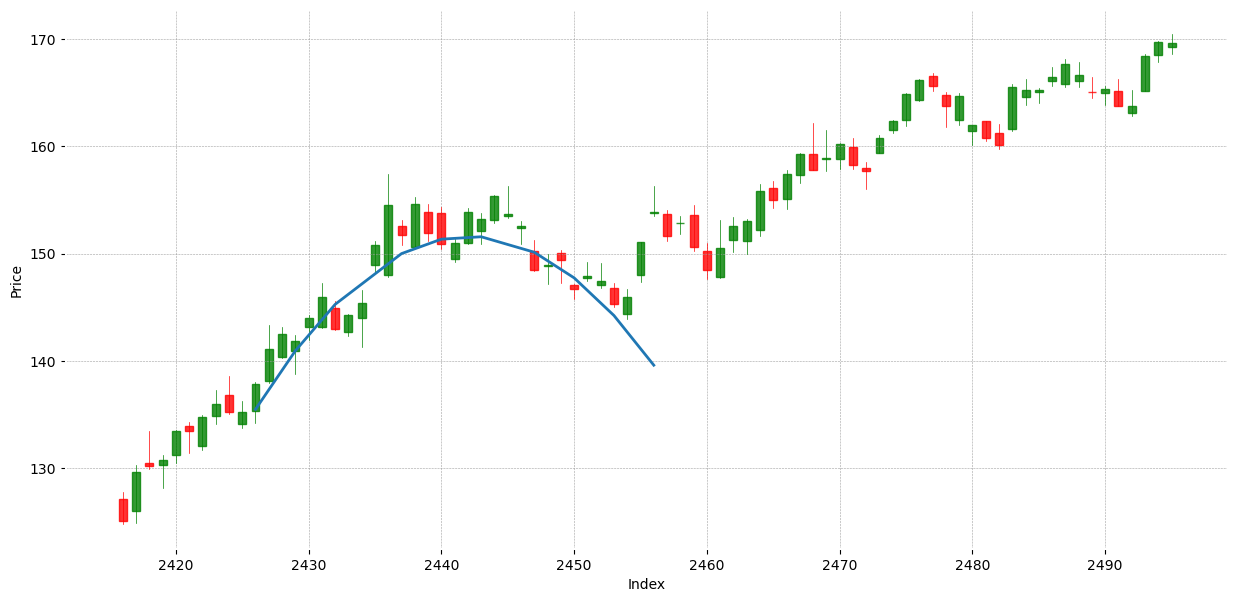

[*********************100%***********************]  1 of 1 completed


KeyboardInterrupt: 

In [17]:
for i in range(0,10):
    stock_data = yf.download(ticker[i],start="2013-06-01",end="2023-06-01")
    df   = stock_data.copy()

    df = df[df['Volume']!=0]
    df.reset_index(drop=True, inplace=True)

    req = df.loc[:, ["Open", "High", "Low", "Close"] ]
    req["Pivot"] = 0

    local_max = argrelextrema(req["Close"].values, np.greater)[0]
    local_min = argrelextrema(req["Close"].values, np.less)[0]   

    for m in local_max:
        req.loc[m, "Pivot"] = 2
        
    for m in local_min:
        req.loc[m, "Pivot"] = 1
    
    lookback = 30
    all_points = find_rounding_top_points(req, lookback)
    
    plot_rounding_top(req, all_points, lookback)